In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from windrose import WindroseAxes

pd.options.display.max_colwidth = None
pd.options.display.max_rows = None

Leo mi dataset original de incendios en la Comunidad Valenciana

In [2]:
df = pd.read_csv("Datasets/df.csv") 

# <span style="color:#FFA500;">Visión General</span>


Cuento el número de filas y columnas

In [3]:
print(f"Dataset shape: {df.shape[0]} filas, {df.shape[1]} columnas")



Dataset shape: 10722 filas, 142 columnas


Hago un análisis estadístico sencillo de las variables

In [4]:
df.describe()

,ET_ID,NUMPARTE,ANYO,C_A,PROV,COMARCA,COM_CODICV,C_MUNI,CODMUN,E_M,...,REFOR,PART_ASOC,ENP_1,S_ARB,S_NFOR,SNARBLEN,SNARBHERB,ID_ENP,SHAPE_AREA,SUPCAR_HA
count,10722.000000,1.072200e+04,10722.000000,10722.0,10722.000000,10722.000000,10722.000000,10722.000000,10722.000000,10722.000000,...,10722.000000,1.072200e+04,1.072200e+04,10722.000000,10722.000000,10722.000000,10722.000000,10722.000000,1.072200e+04,10722.000000
mean,5360.500000,2.003362e+09,2003.104085,9.0,25.706864,2588.666667,18.023317,110.302742,25817.167133,0.602220,...,1.994777,1.348724e+07,1.394539e+05,0.200690,0.036312,0.186446,0.109778,0.499161,2.933715e+05,29.337063
std,3095.319127,6.717958e+06,6.708099,0.0,19.573356,1955.994219,10.039332,89.977302,19607.342033,2.847891,...,0.072084,1.640413e+08,7.343528e+05,7.308137,2.031820,5.340720,4.883665,2.693574,6.329750e+06,632.975043
min,0.000000,1.993030e+09,1993.000000,9.0,3.000000,326.000000,0.000000,0.000000,3001.000000,0.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2680.250000,1.998030e+09,1998.000000,9.0,3.000000,334.000000,8.000000,48.000000,3133.000000,0.000000,...,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,6.521750e+01,0.010000
50%,5360.500000,2.003120e+09,2003.000000,9.0,12.000000,1207.000000,20.000000,97.000000,12130.000000,0.000000,...,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,7.615300e+02,0.080000
75%,8040.750000,2.009120e+09,2009.000000,9.0,46.000000,4619.000000,27.000000,144.000000,46142.000000,0.000000,...,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,6.025727e+03,0.600000
max,10721.000000,2.015460e+09,2015.000000,9.0,46.000000,4625.000000,34.000000,999.000000,46999.000000,38.000000,...,2.000000,2.015460e+09,4.633047e+06,581.000000,201.000000,318.330000,334.000000,21.000000,3.275673e+08,32756.730000


Compruebo valores faltantes en mi dataset y los muestro de más a menos faltantes. Se eliminan de la visualización las columnas sin faltantes.

In [5]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = missing_percentage[missing_percentage > 0].sort_values(ascending=False).to_frame()
missing_df.columns = ["Porcentaje de faltantes"]
columns_with_missing = missing_df.index.tolist()
missing_df


,Porcentaje de faltantes
NCAUSANT,100.000000
TATACI_TXT,98.796866
ENP_1_TXT,93.182242
ID_ENP_TXT,93.172916
MOTIV_TXT,93.060996
RETARD_TXT,90.225704
HPBRIGHEL,84.695020
FPBRIGHEL,84.433874
OBSERV,81.421377
HPM_AEEXT,57.414661


C:\Users\Migue\AppData\Local\Temp\ipykernel_8612\1356493334.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = df.groupby("year").apply(lambda x: x.isnull().mean()) * 100


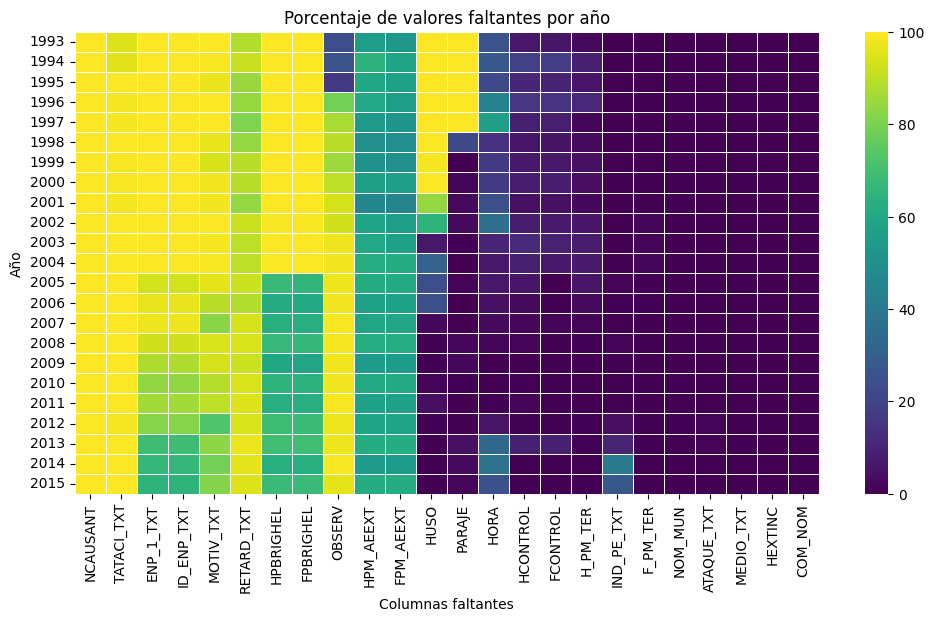

In [6]:
df["F_DETEC"] = pd.to_datetime(df["F_DETEC"], format="%d/%m/%Y")

# Crear una nueva columna con el año
df["year"] = df["F_DETEC"].dt.year


missing_by_year = df.groupby("year").apply(lambda x: x.isnull().mean()) * 100
missing_by_year_filtered = missing_by_year[columns_with_missing]


plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_year_filtered, cmap="viridis", cbar=True, linewidths=0.5)

plt.title("Porcentaje de valores faltantes por año")
plt.xlabel("Columnas faltantes")
plt.ylabel("Año")

# Show plot
plt.show()

Compruebo el tipo de datos que tengo en cada una de las features

In [7]:
df.dtypes

ET_ID                  int64
NUMPARTE               int64
ANYO                   int64
C_A                    int64
CCAA_NOM              object
PROV                   int64
PROV_NOM              object
COMARCA                int64
COM_NOM               object
COM_CODICV             int64
C_MUNI                 int64
CODMUN                 int64
NOM_MUN               object
E_M                    int64
PARAJE                object
HOJA                   int64
CUAD                  object
HUSO                 float64
X                    float64
Y                    float64
F_DETEC       datetime64[ns]
F_DET_AMD             object
H_DETEC               object
F_PM_TER              object
H_PM_TER              object
FPM_AEEXT             object
HPM_AEEXT             object
FPBRIGHEL             object
HPBRIGHEL             object
FCONTROL              object
HCONTROL              object
FEXTINC               object
HEXTINC               object
DETECPOR               int64
DETECP_TXT    

# <span style="color:#FFA500;">Calidad de los datos</span>

Compruebo si hay filas repetidas

In [8]:
duplicated_rows = df.duplicated().sum() 
print(f"Hay {duplicated_rows} filas repetidas")

Hay 0 filas repetidas


Hallo el número de valores diferentes por cada una de las columnas en búsqueda de variables categóricas. 

In [9]:
df.nunique()

ET_ID         10722
NUMPARTE      10722
ANYO             23
C_A               1
CCAA_NOM          1
PROV              3
PROV_NOM          3
COMARCA          35
COM_NOM          34
COM_CODICV       35
C_MUNI          249
CODMUN          482
NOM_MUN         478
E_M              26
PARAJE         6140
HOJA              7
CUAD            167
HUSO              5
X              4809
Y              4948
F_DETEC        4583
F_DET_AMD      4583
H_DETEC        1080
F_PM_TER       4576
H_PM_TER        789
FPM_AEEXT      2816
HPM_AEEXT       471
FPBRIGHEL      1094
HPBRIGHEL       323
FCONTROL       4472
HCONTROL        701
FEXTINC        4625
HEXTINC         893
DETECPOR          7
DETECP_TXT        7
VIGFIJ           38
INIJUNTA         10
INIJUN_TXT       10
T_CAUSA           2
T_CAUS_TXT        2
G_CAUSA           6
G_CAUS_TXT        5
CAUSAS           32
MOTIVAC          20
MOTIV_TXT        18
DTORMENTA        25
CAUSANTE          2
CAUSAN_TXT        2
NCAUSANT          0
GCC              39


Selecciono las columnas númericas y dibujo boxplots de cada una de ellas. Antes de representarlos imputo los faltantes con la mediana y elimino del estudio las columnas que solo tienen un valor posible.

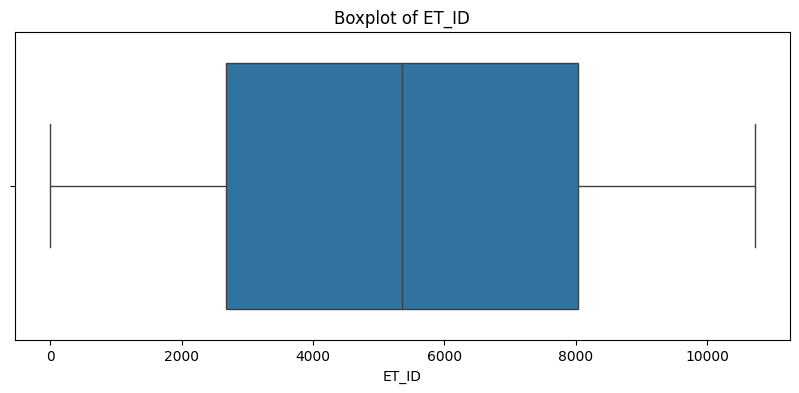

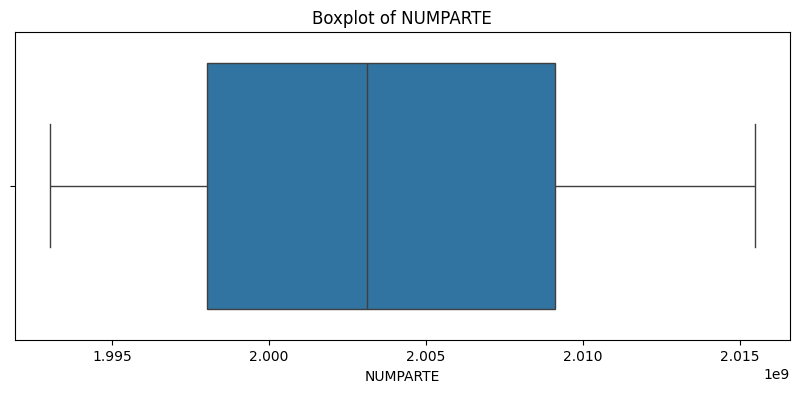

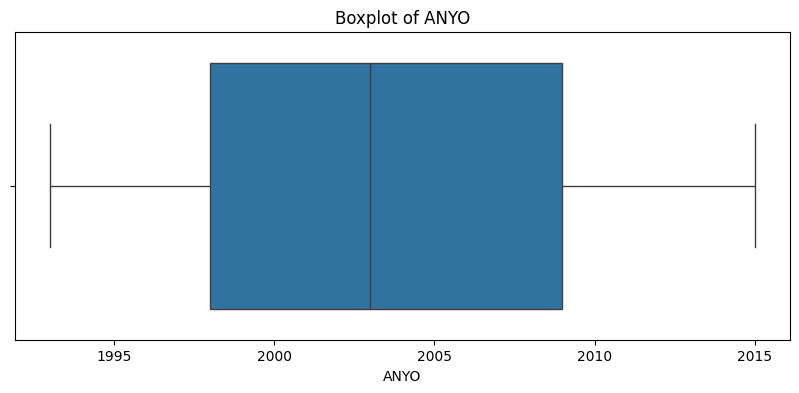

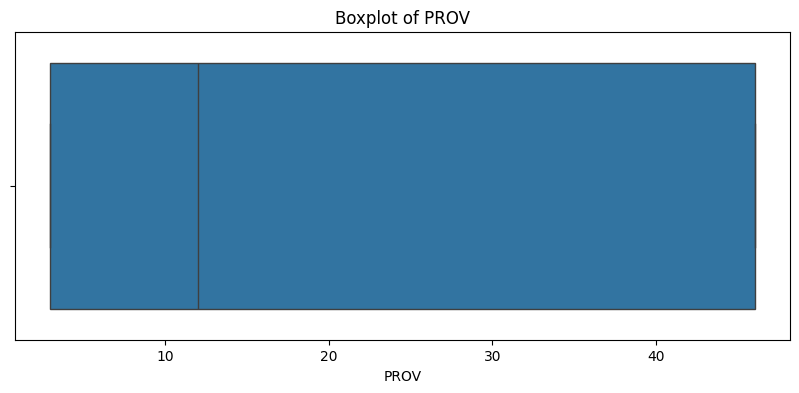

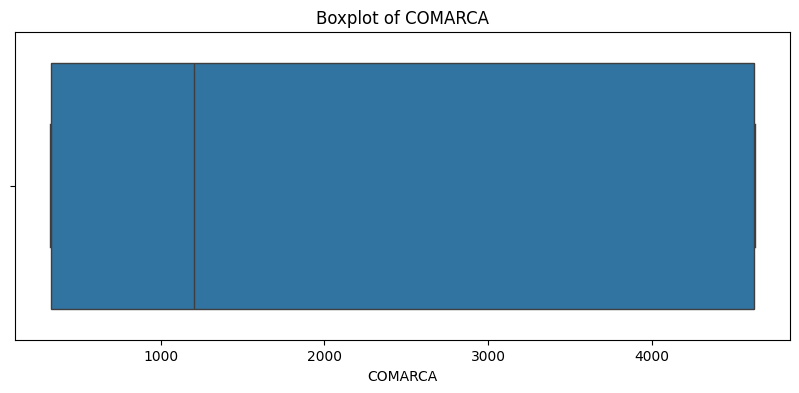

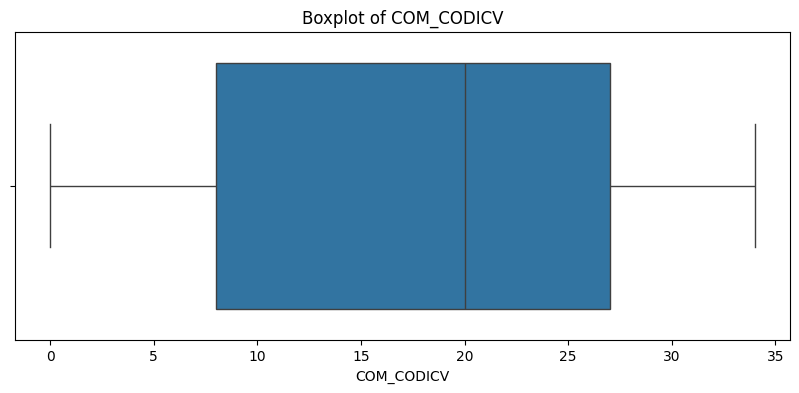

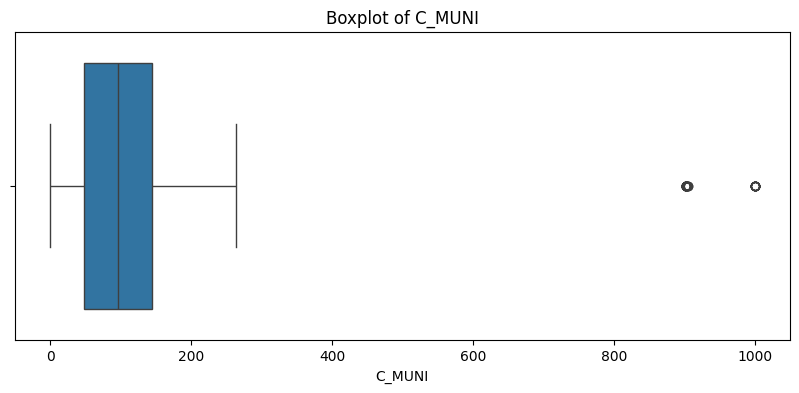

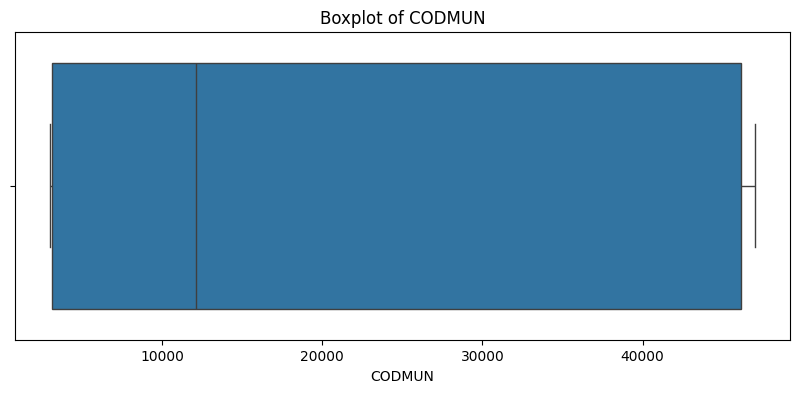

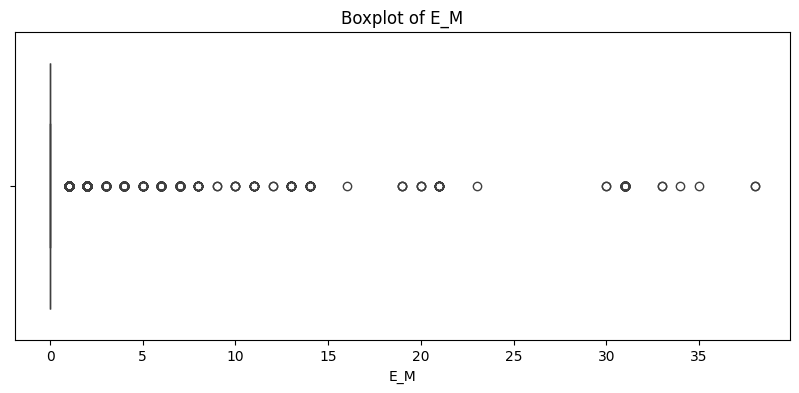

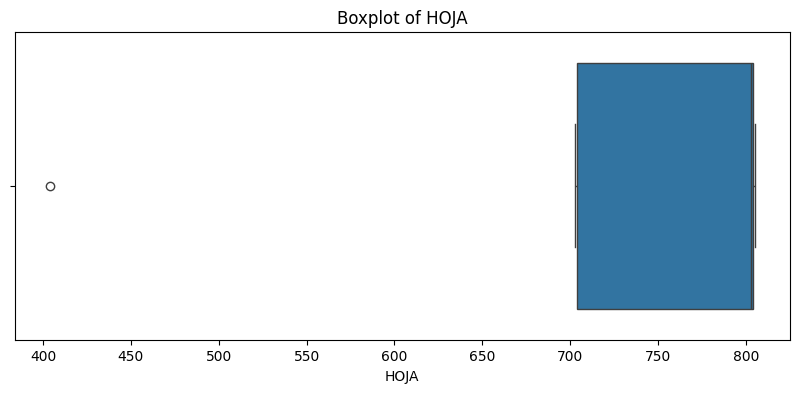

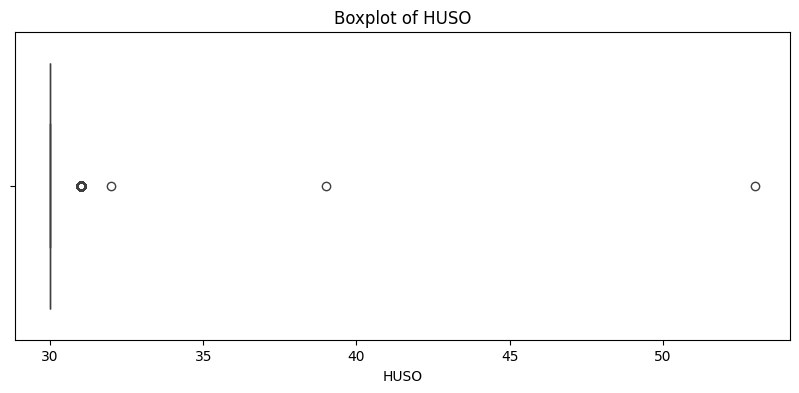

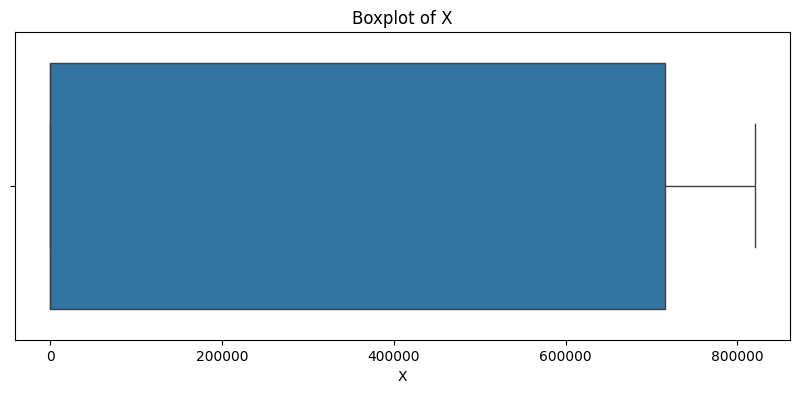

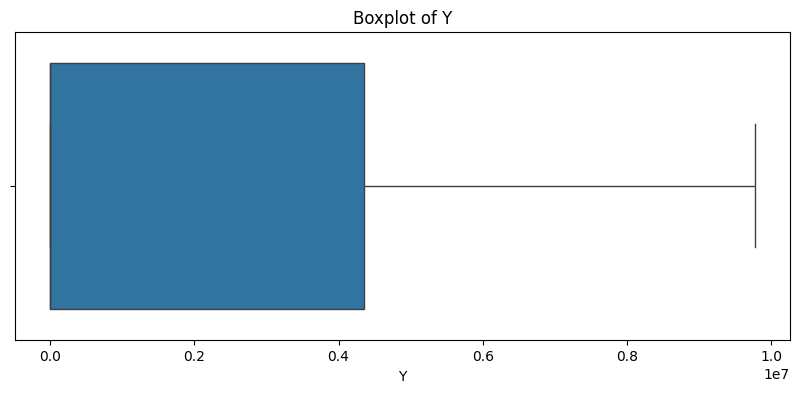

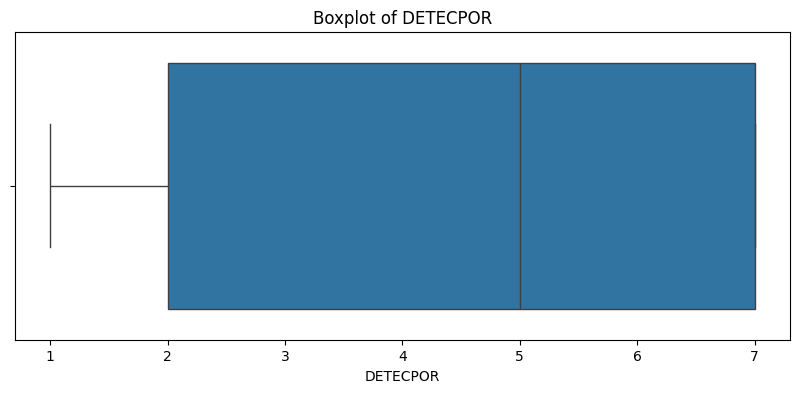

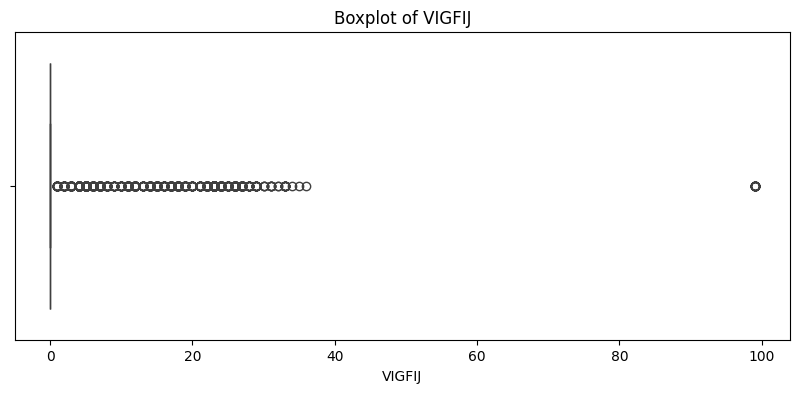

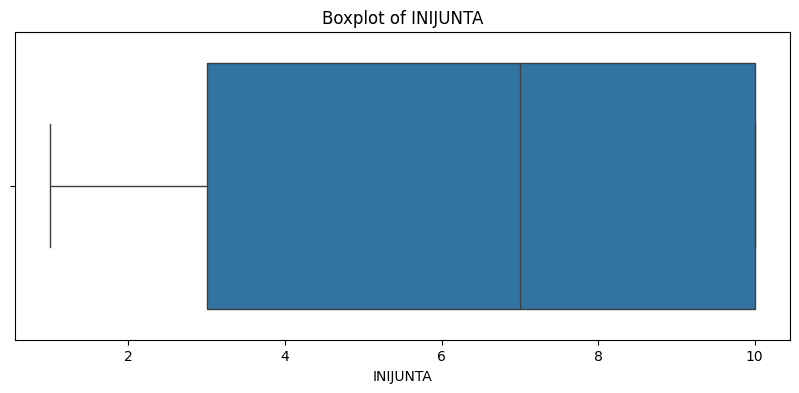

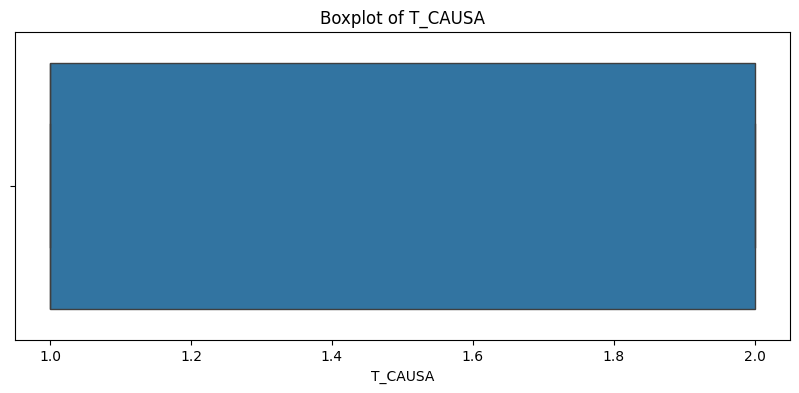

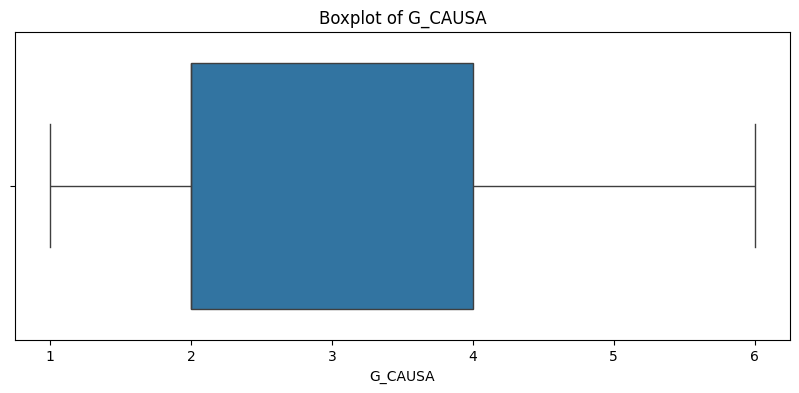

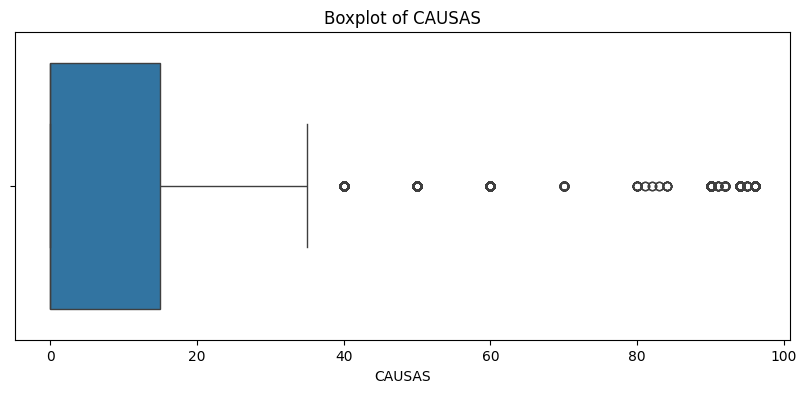

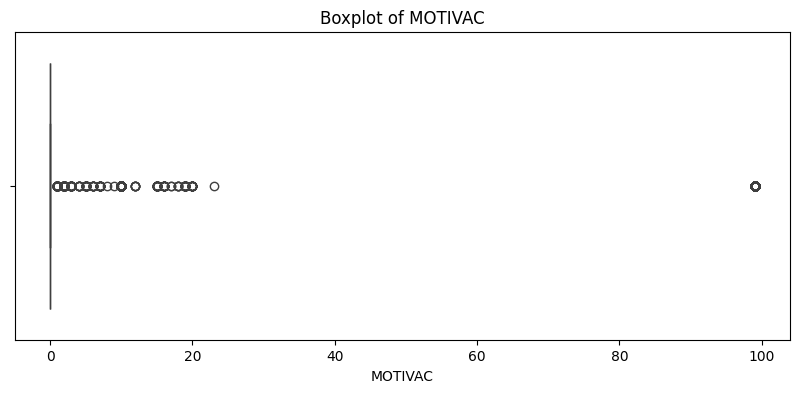

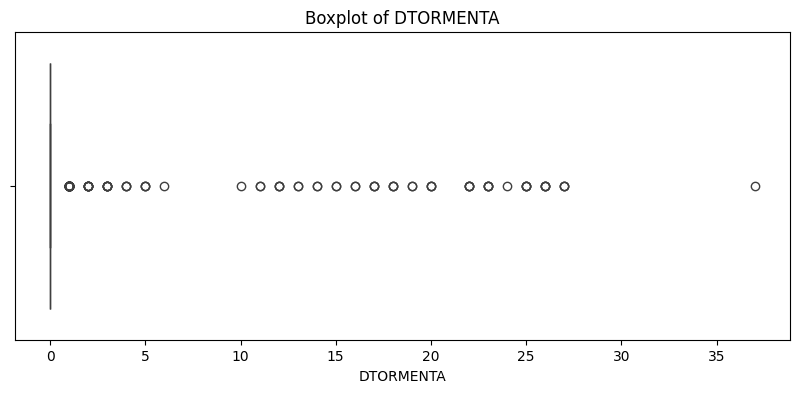

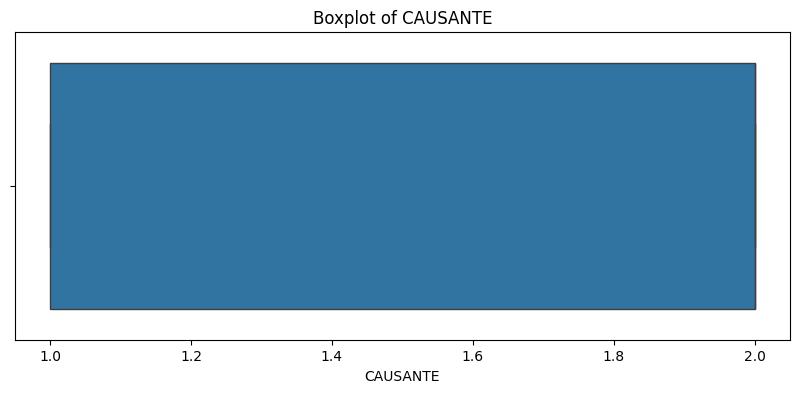

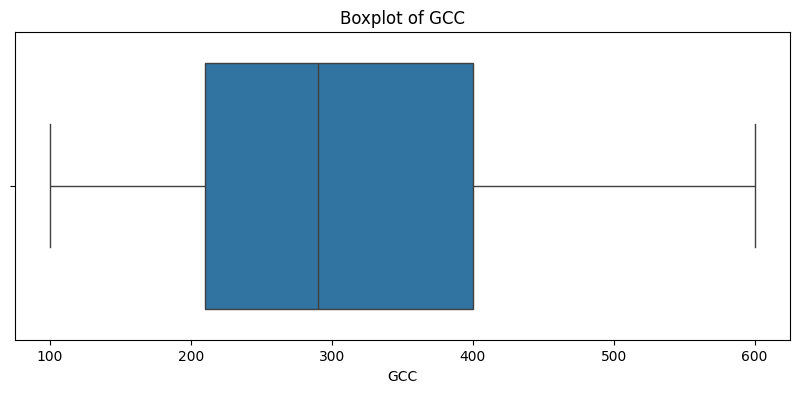

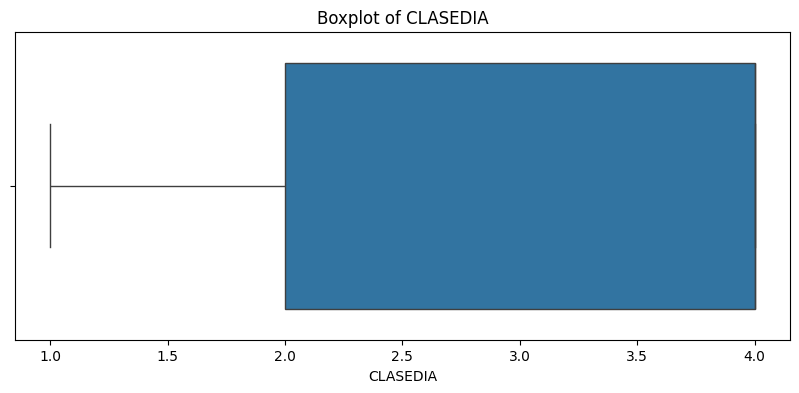

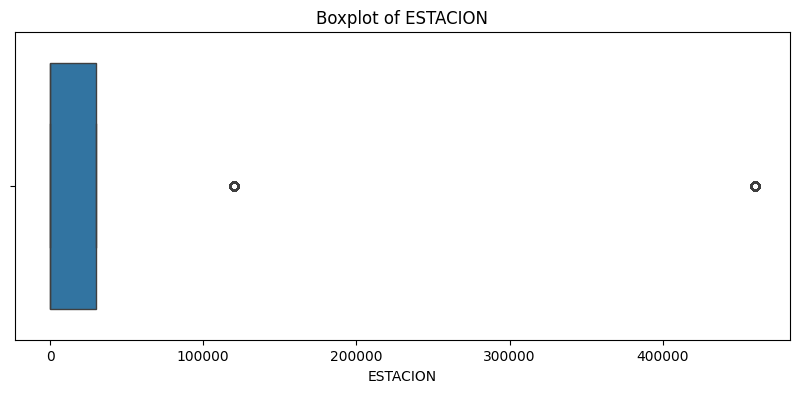

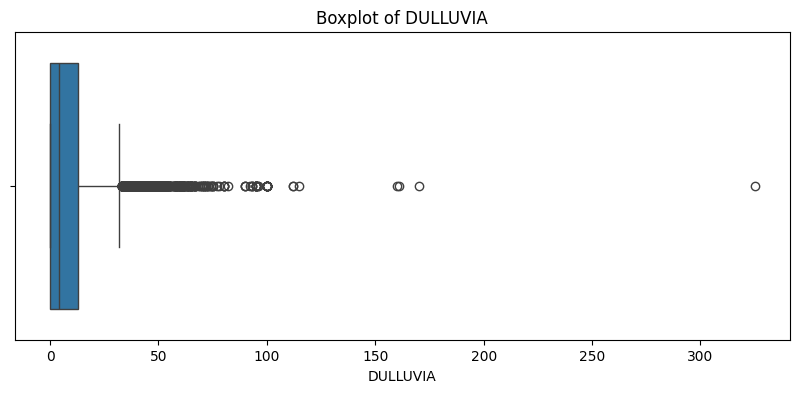

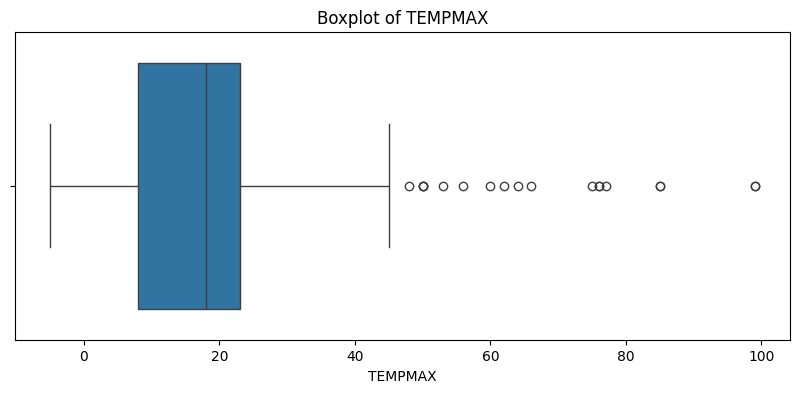

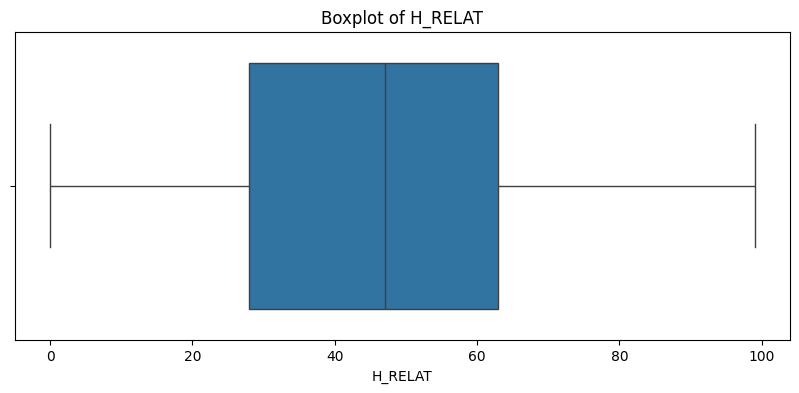

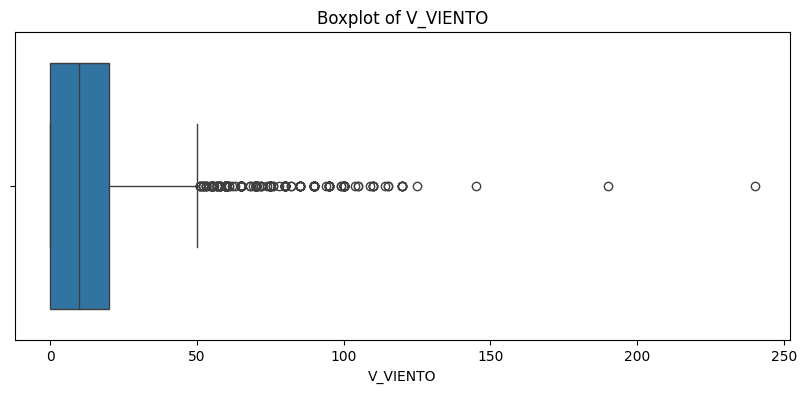

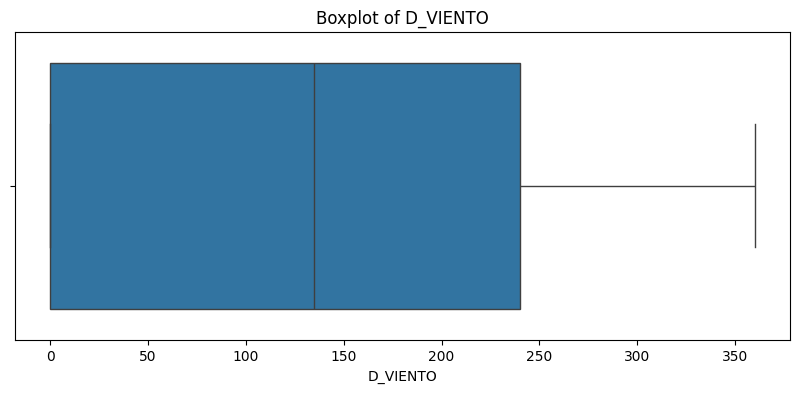

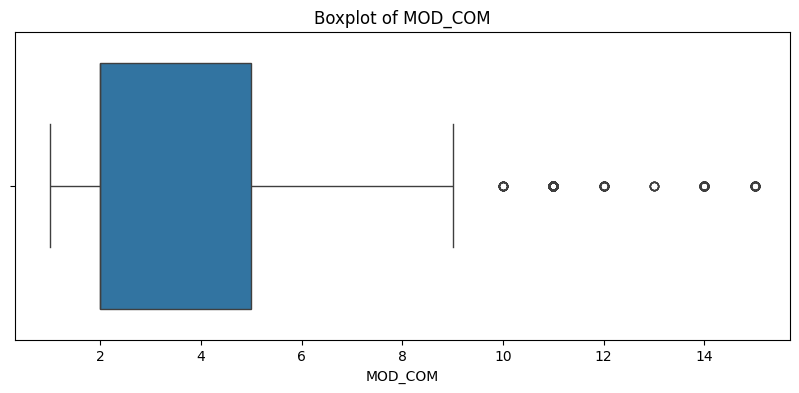

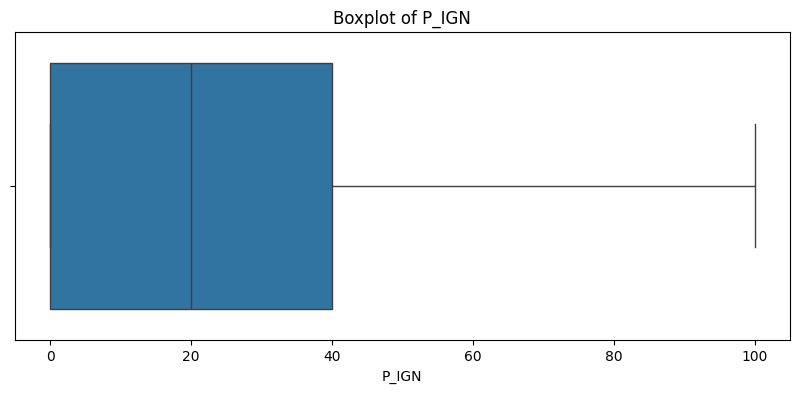

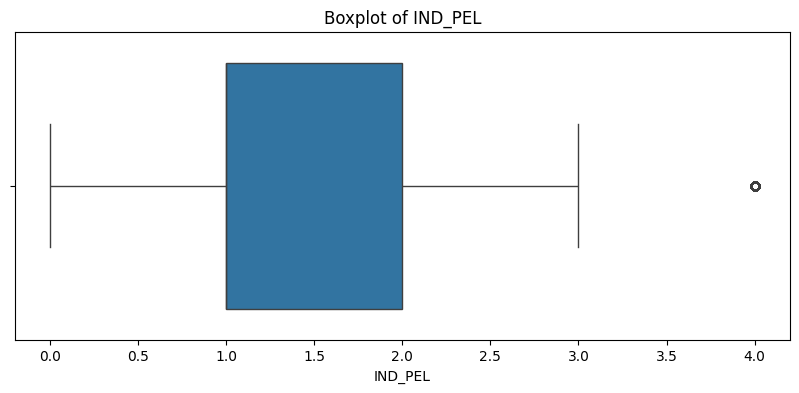

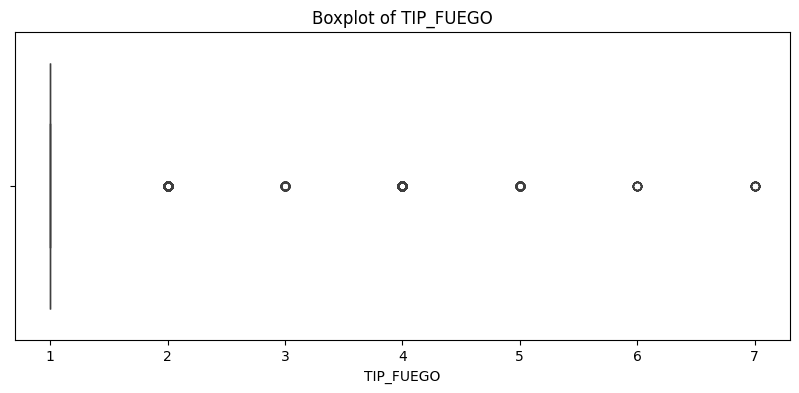

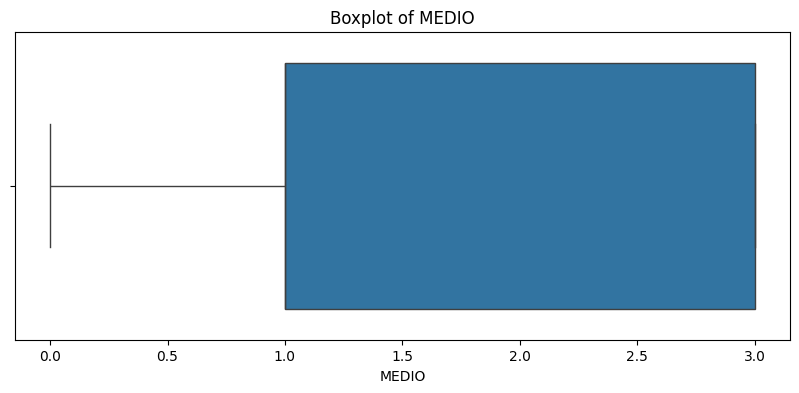

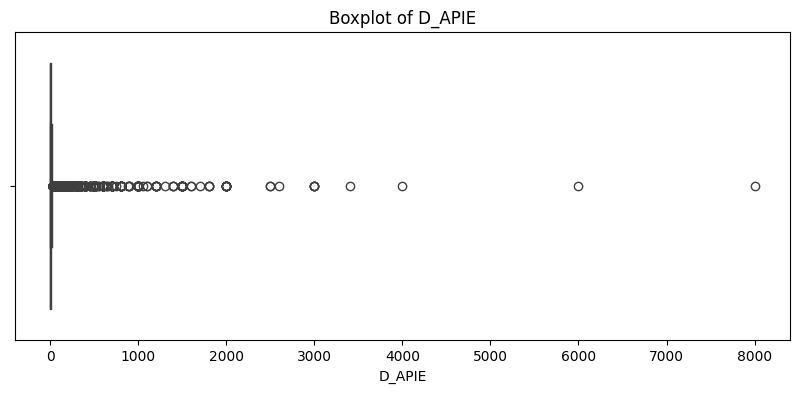

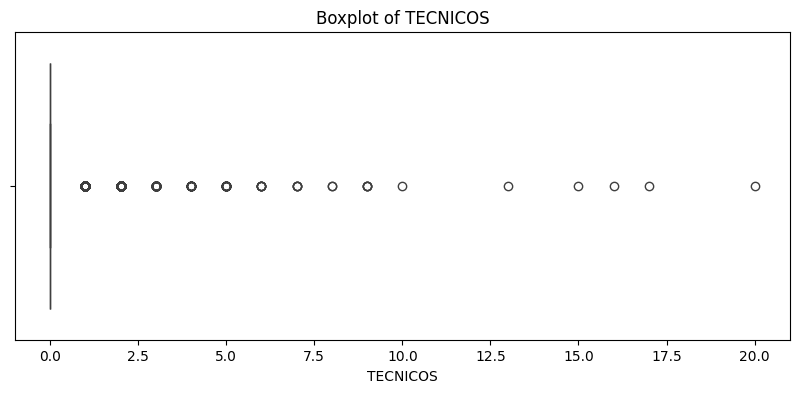

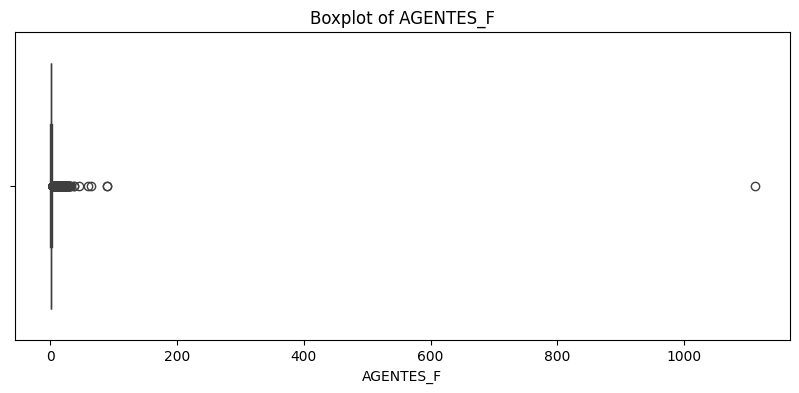

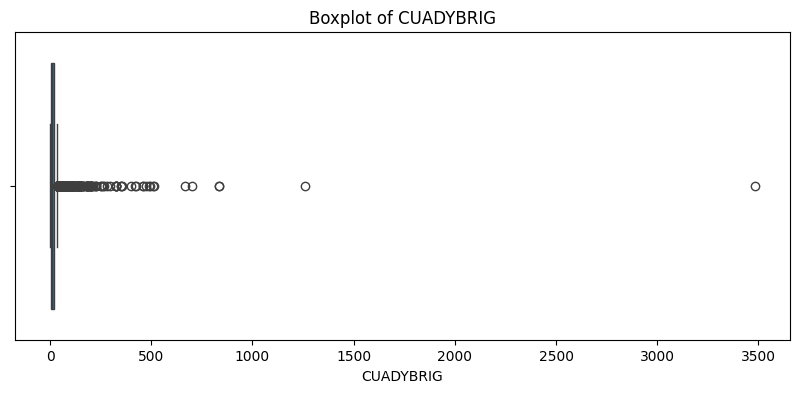

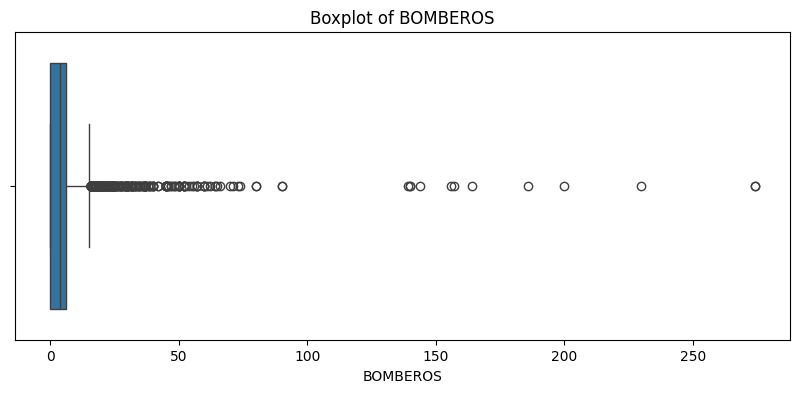

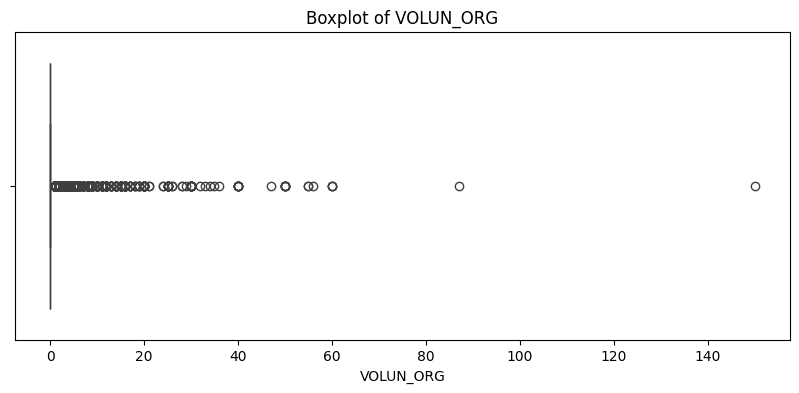

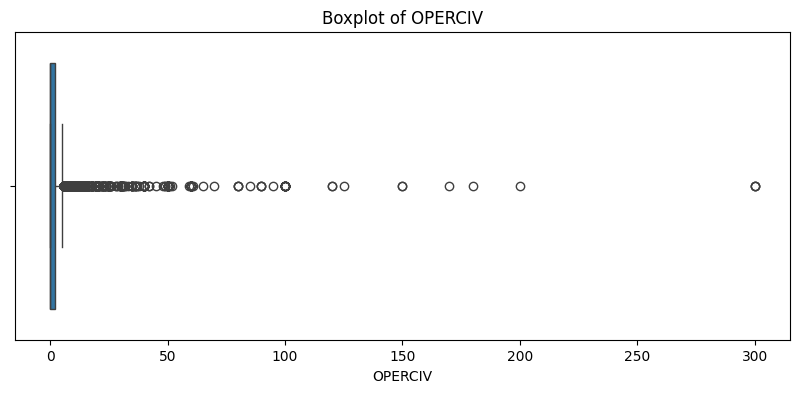

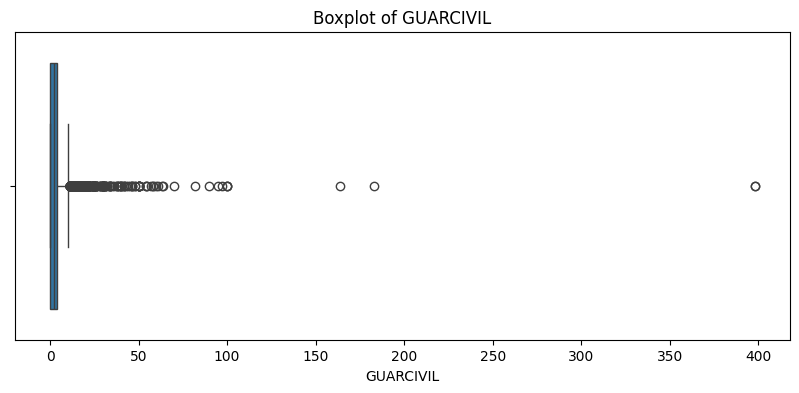

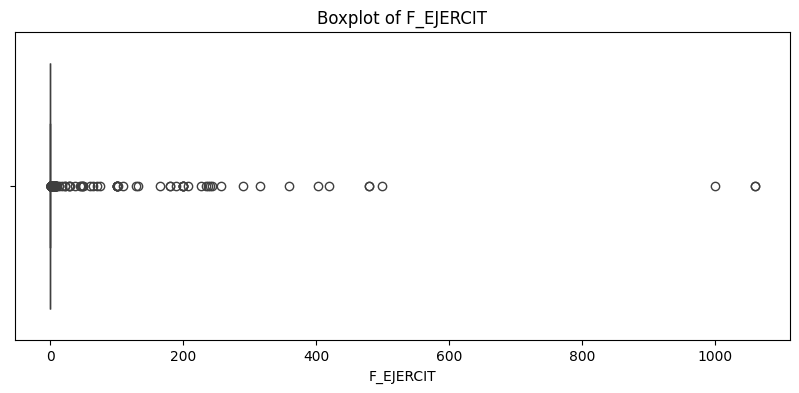

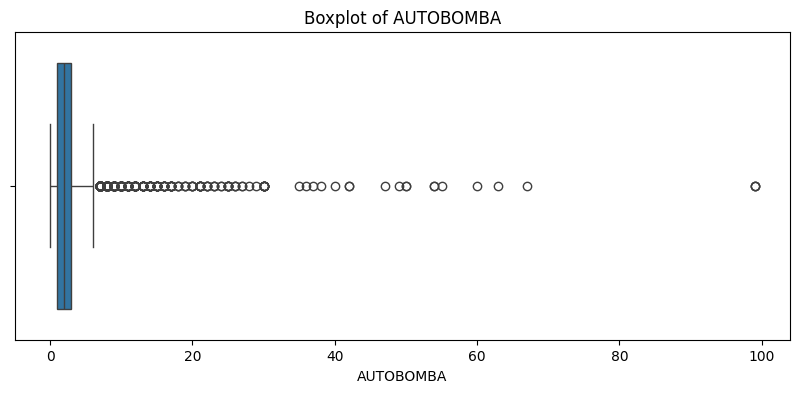

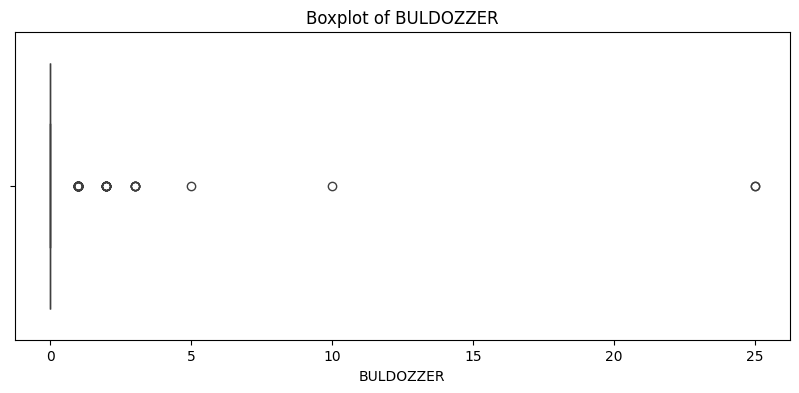

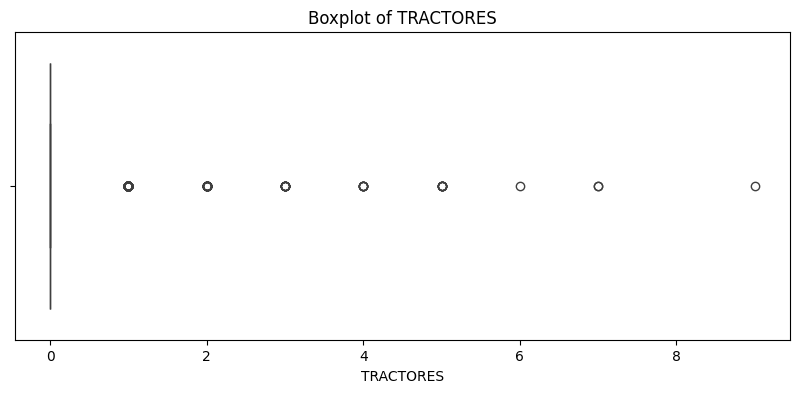

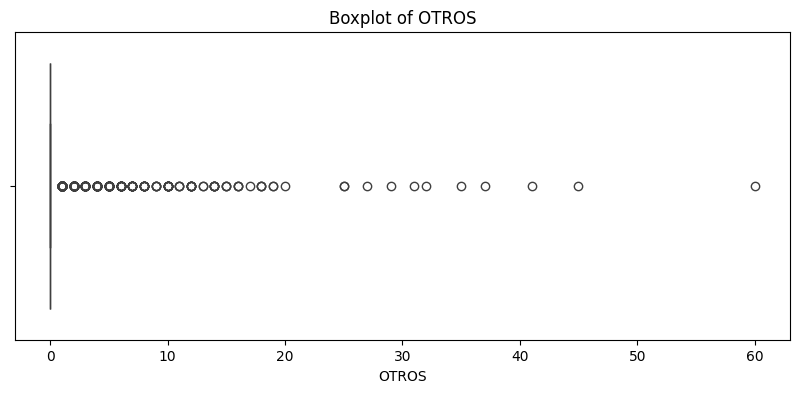

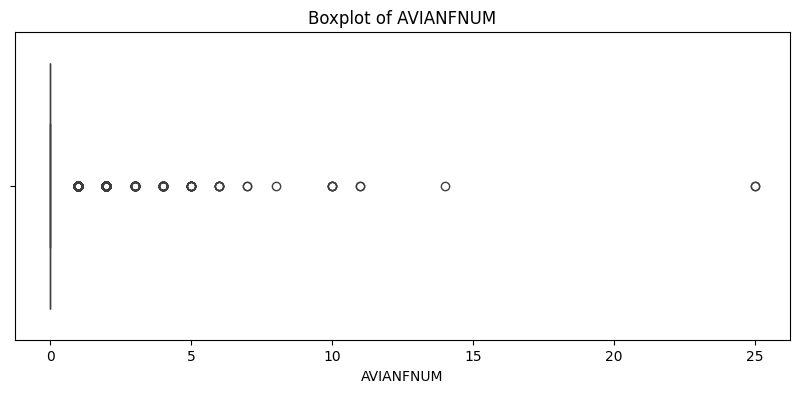

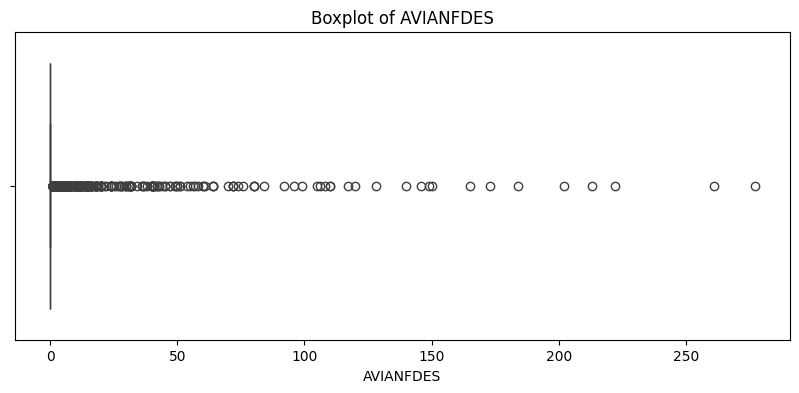

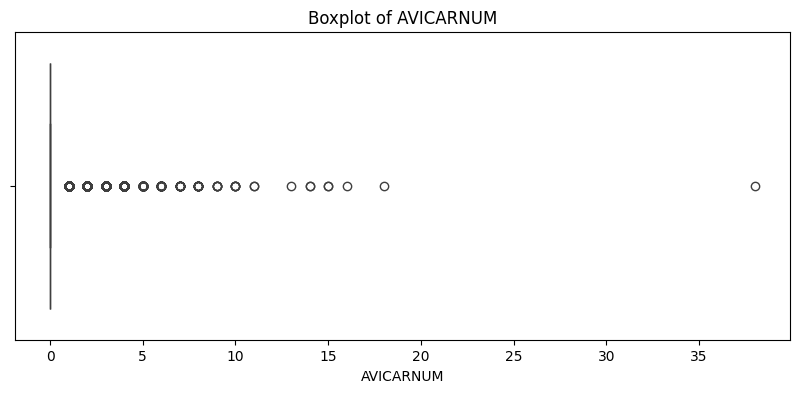

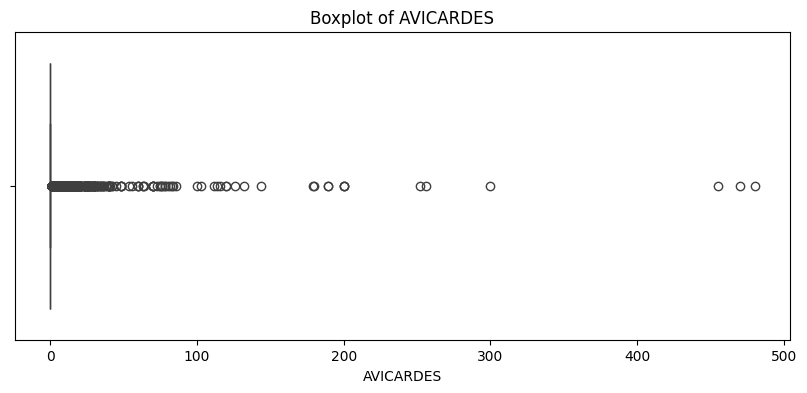

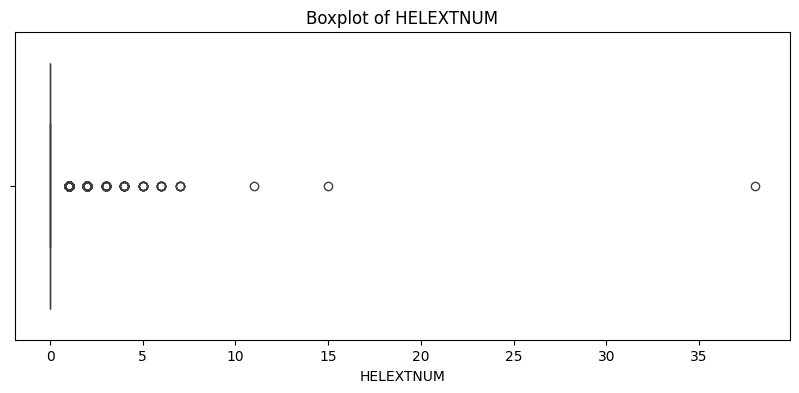

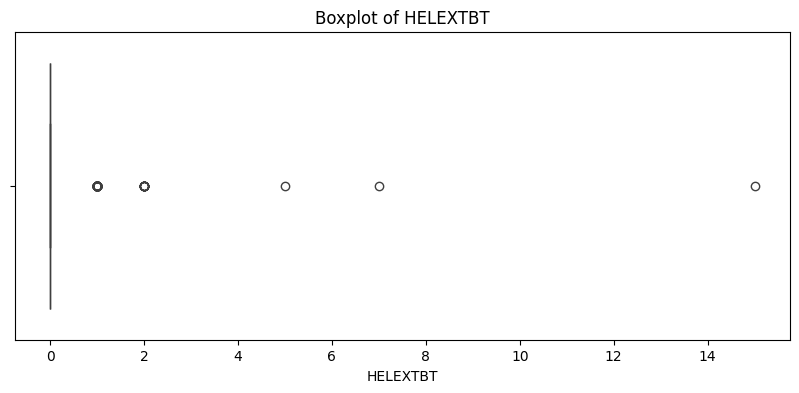

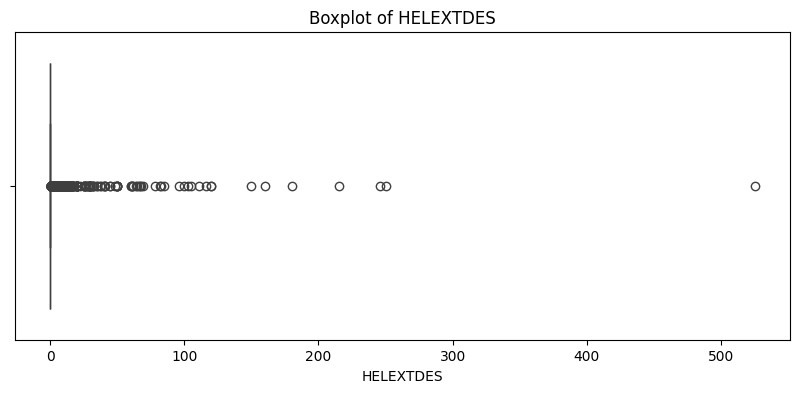

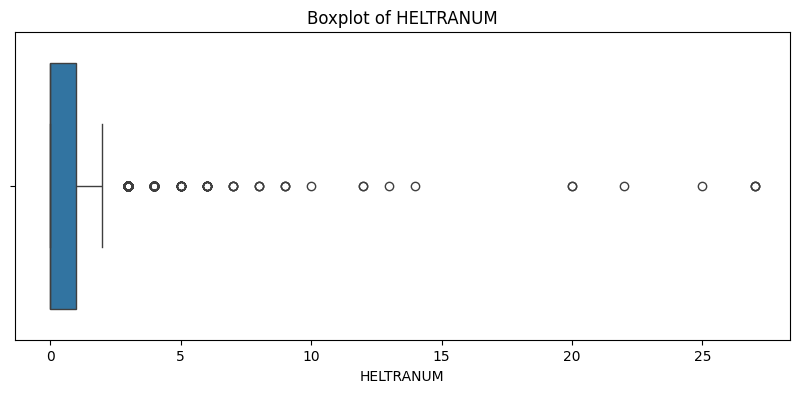

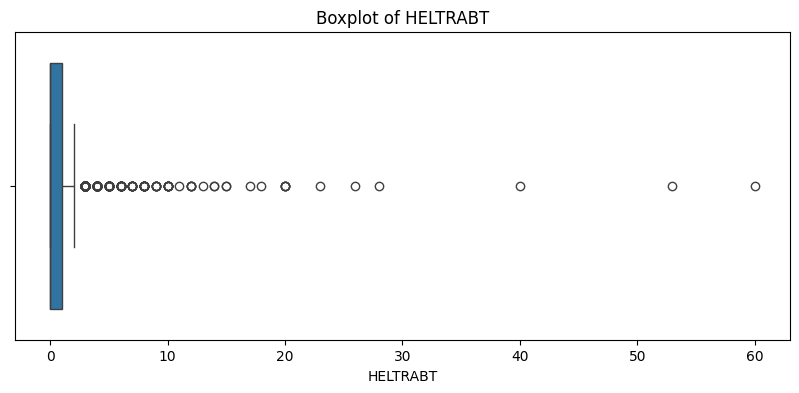

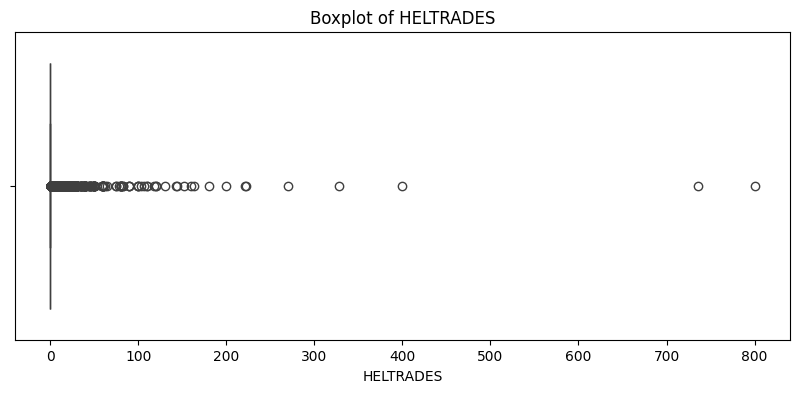

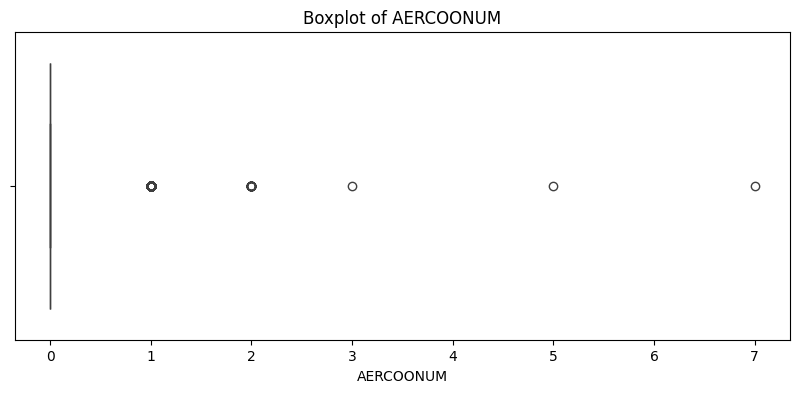

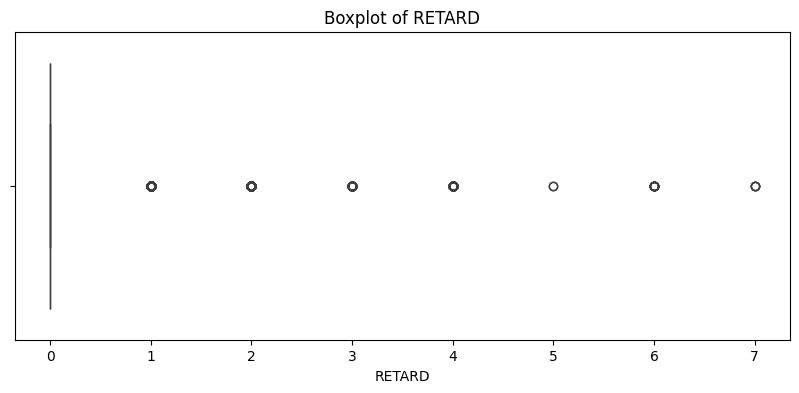

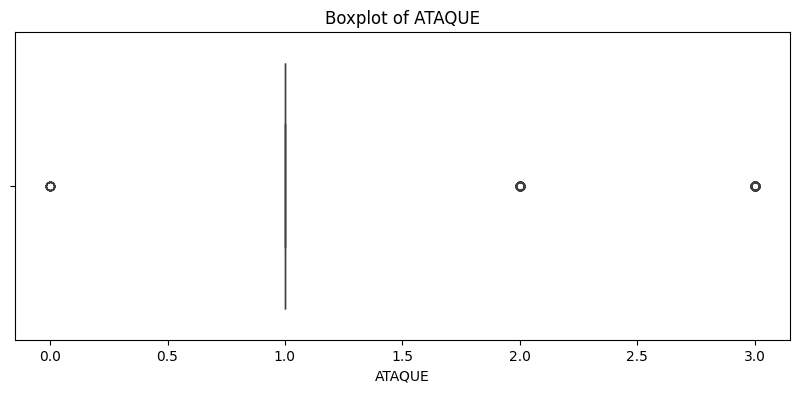

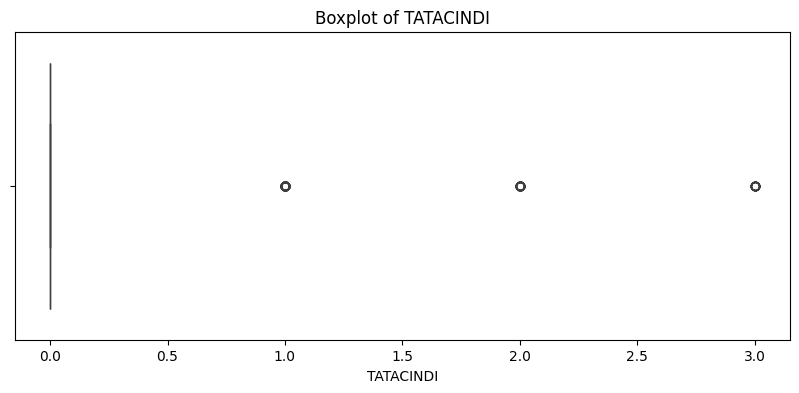

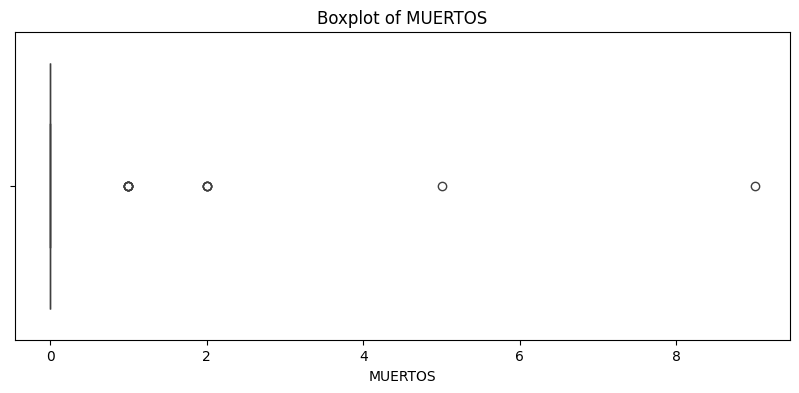

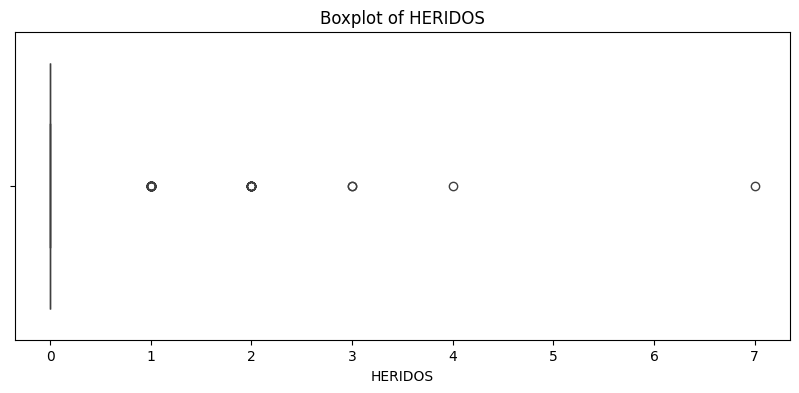

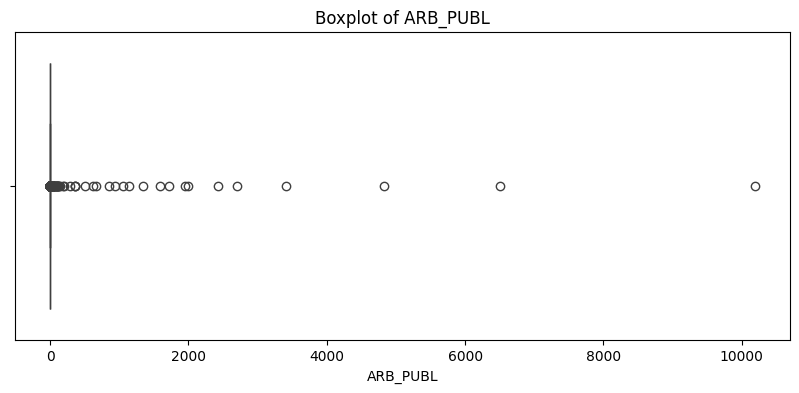

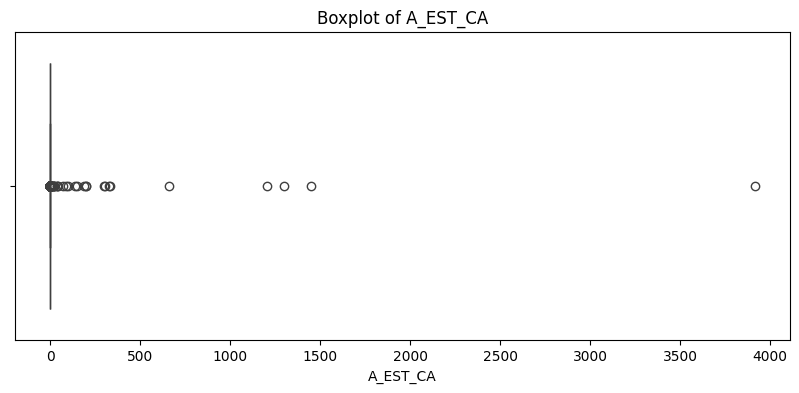

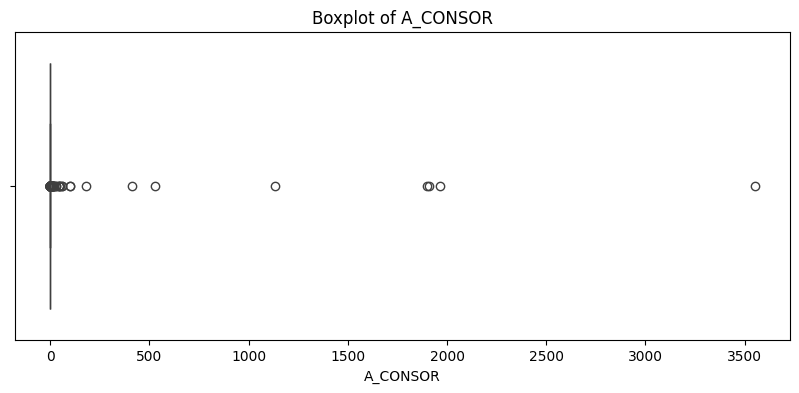

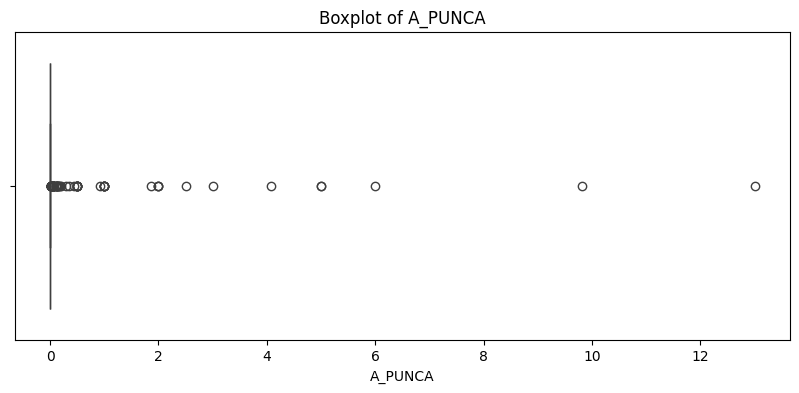

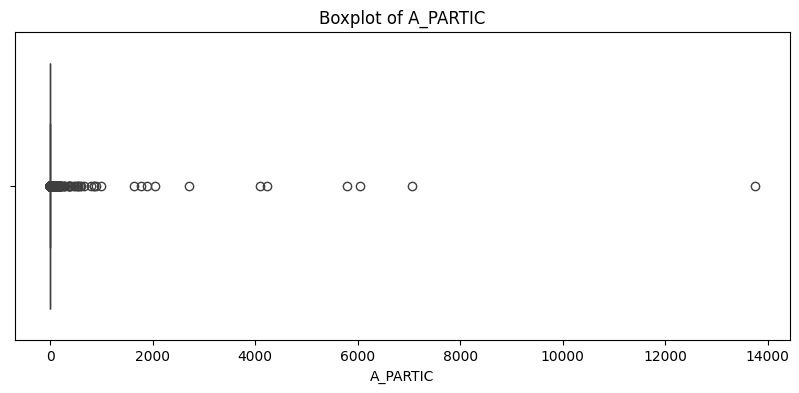

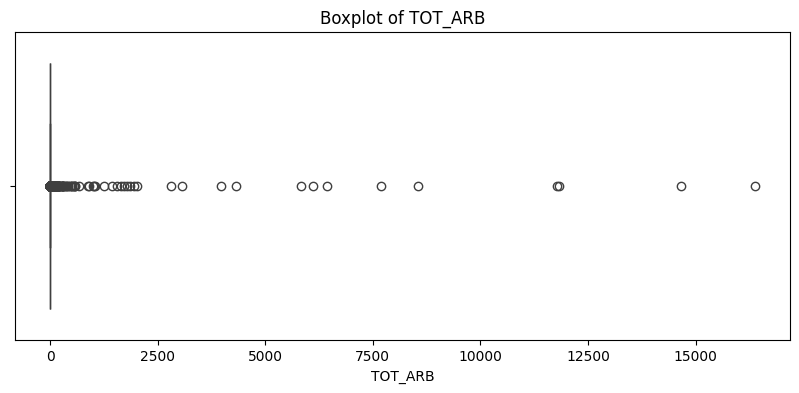

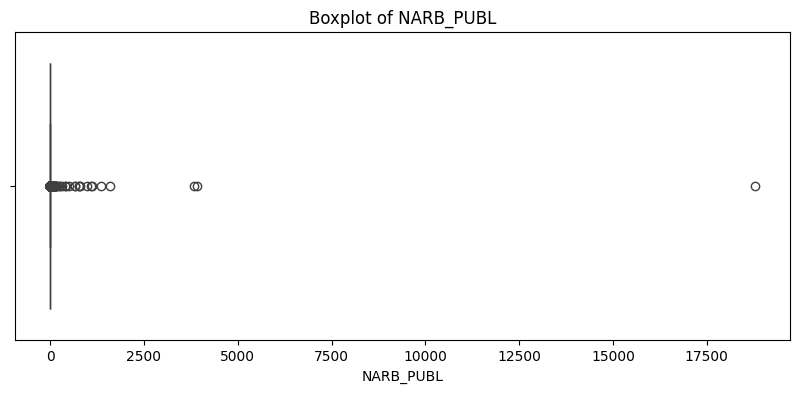

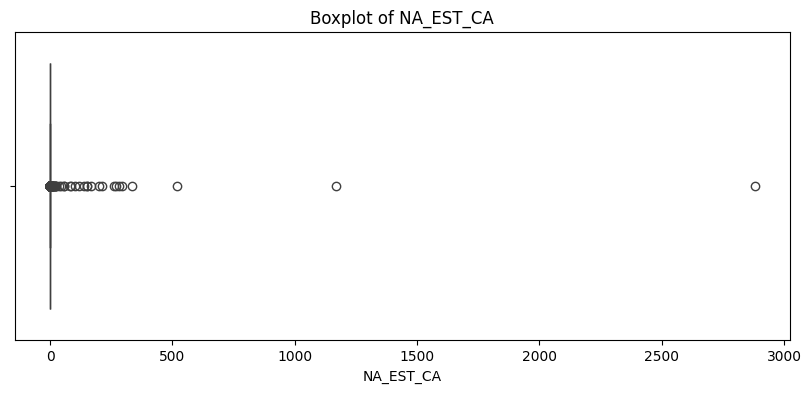

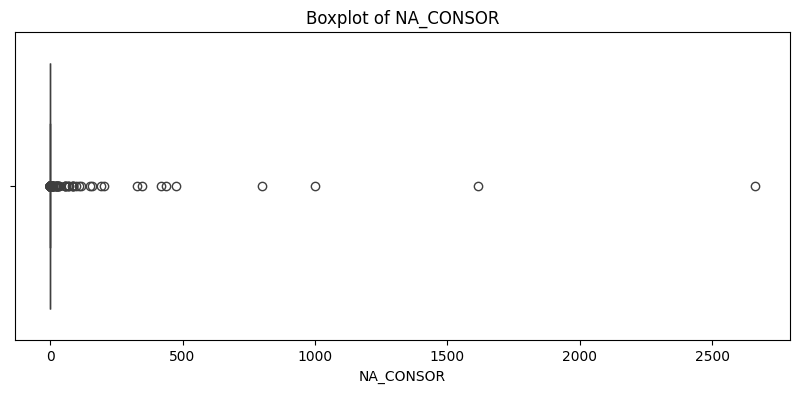

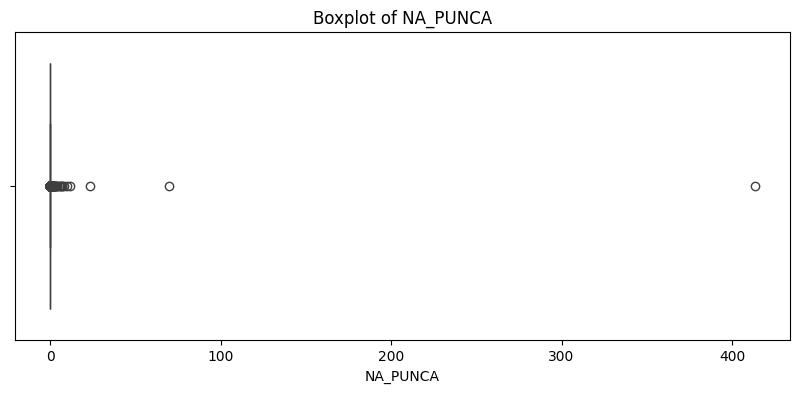

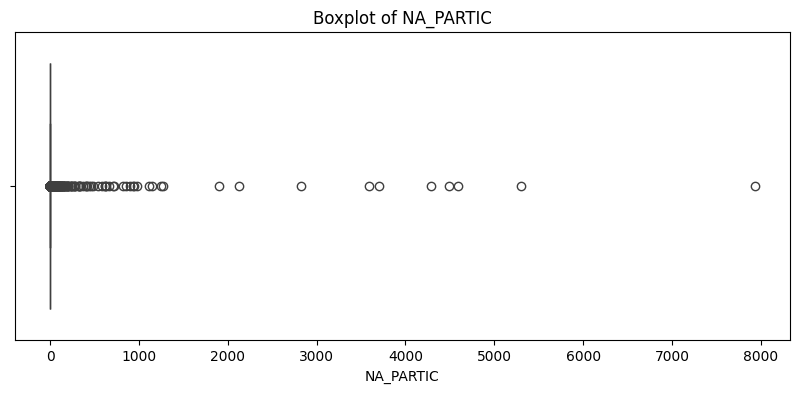

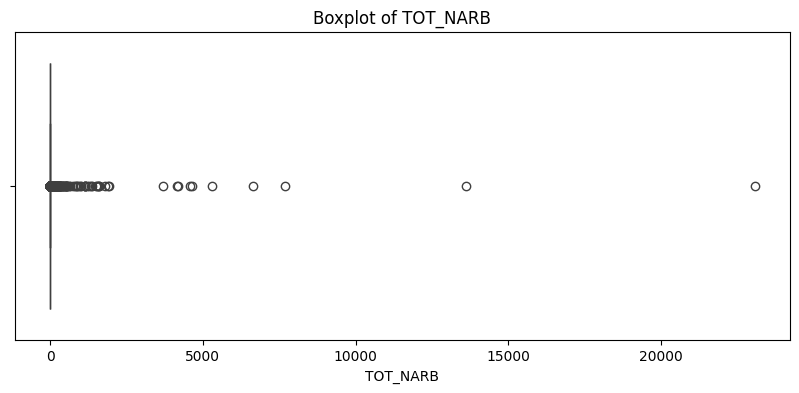

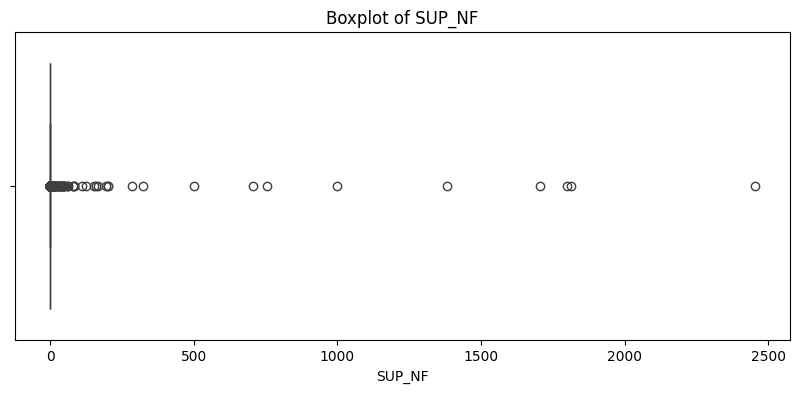

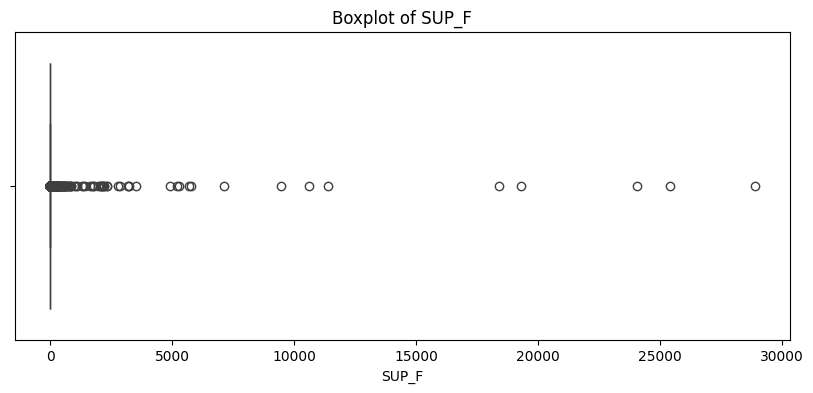

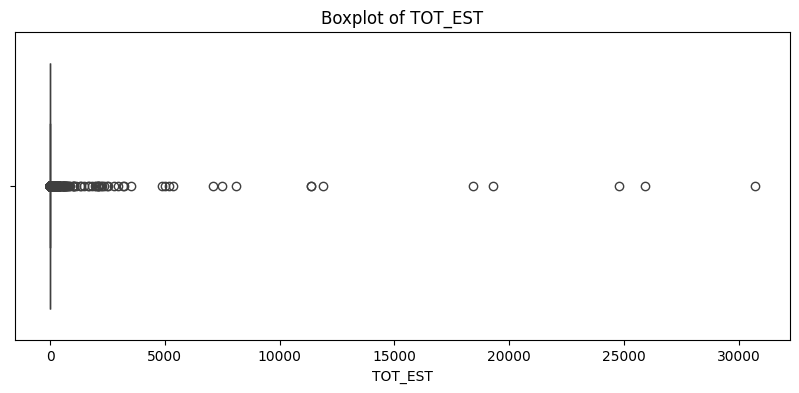

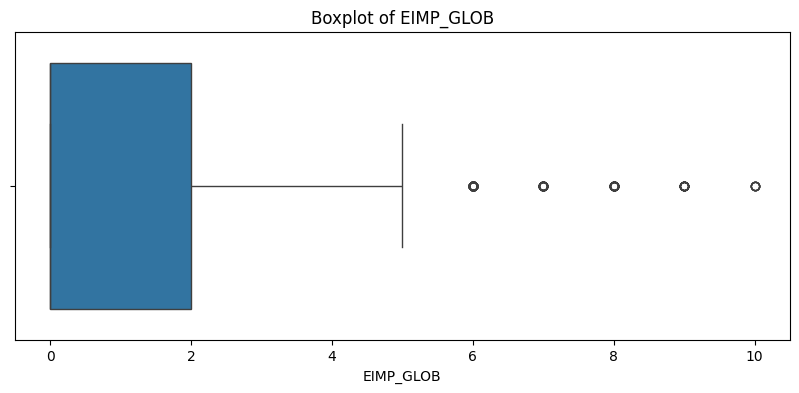

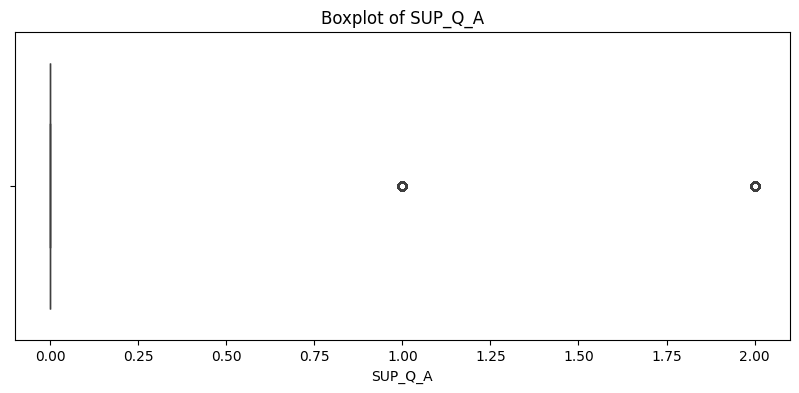

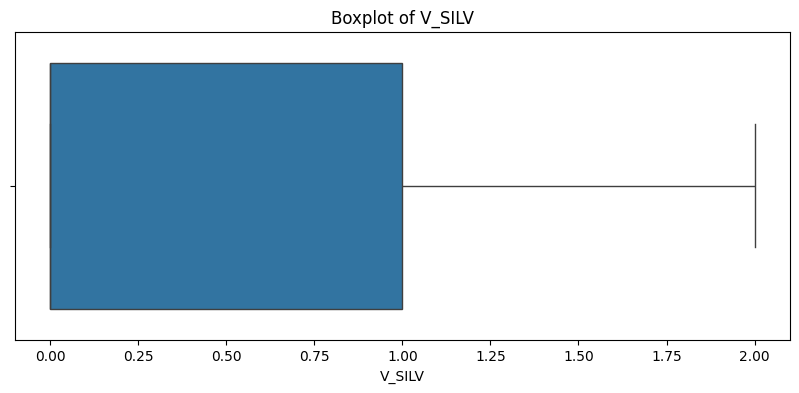

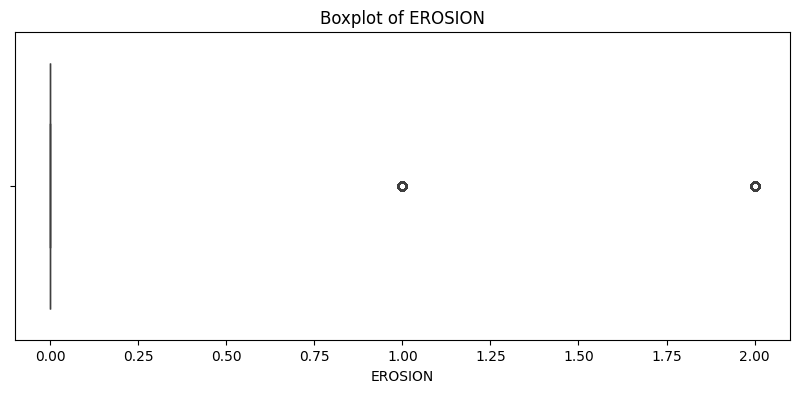

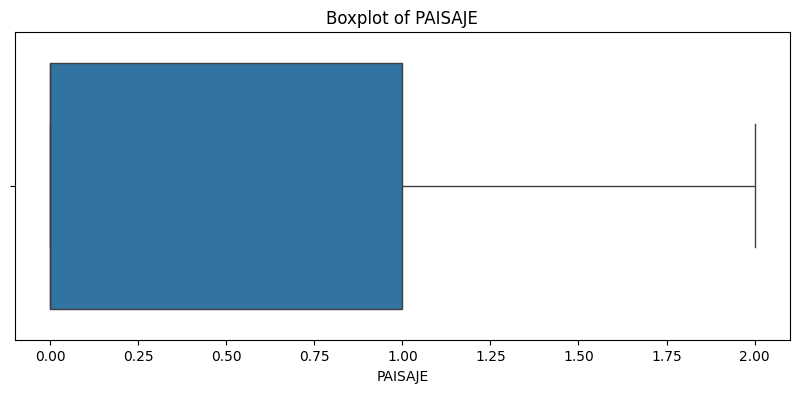

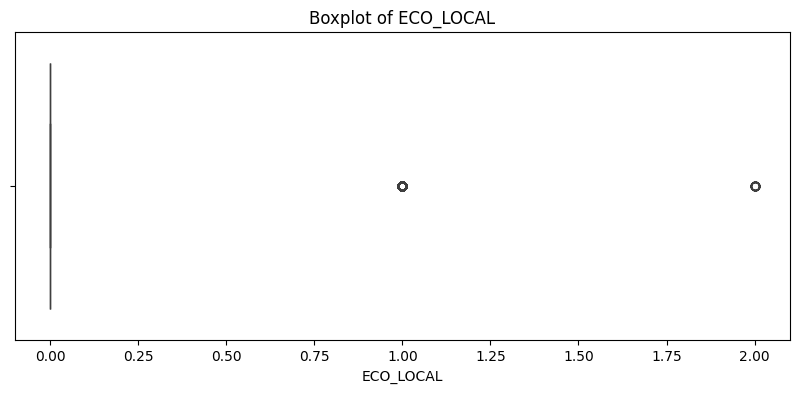

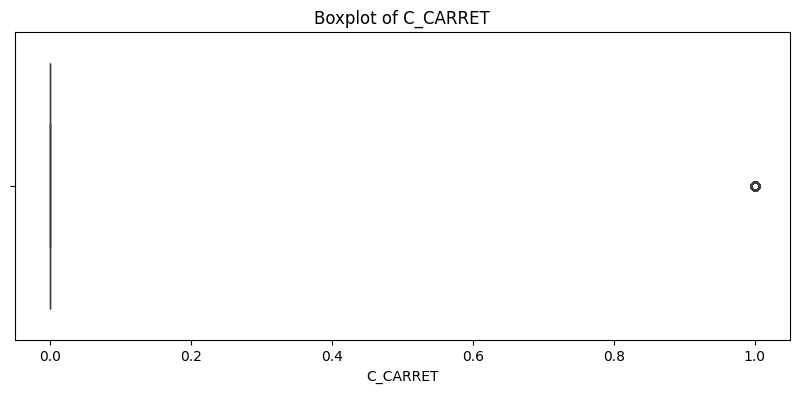

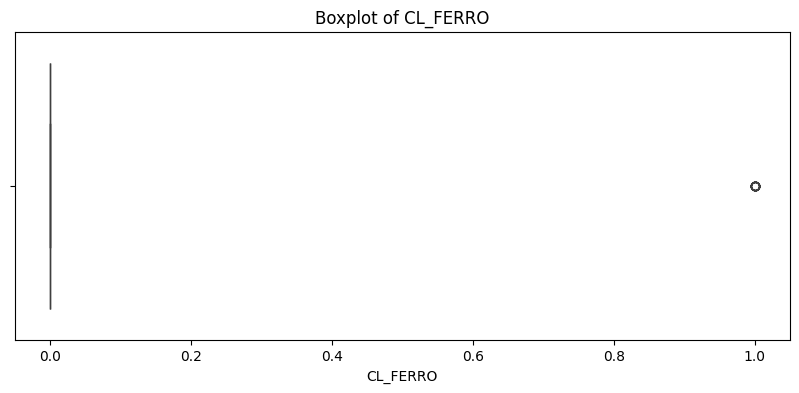

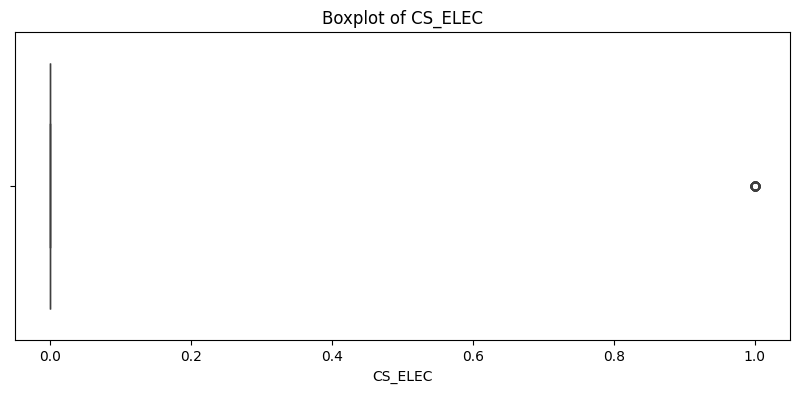

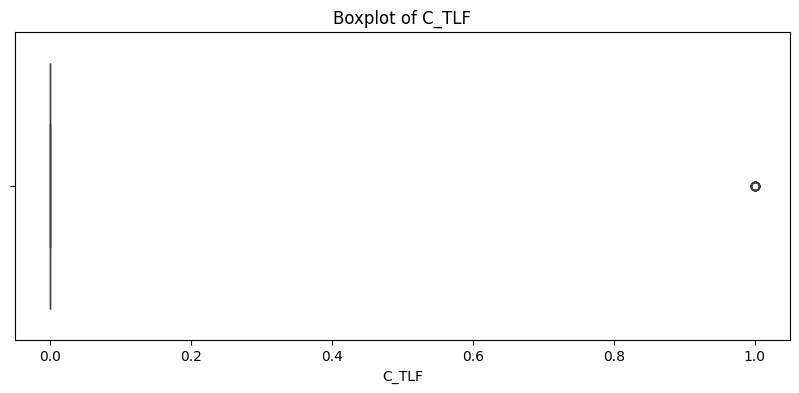

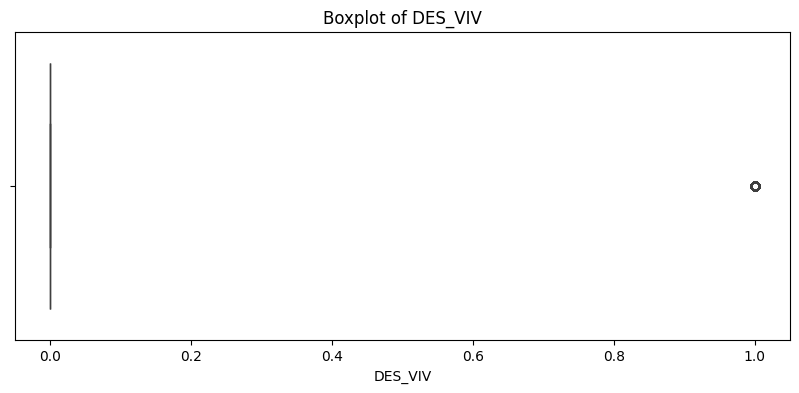

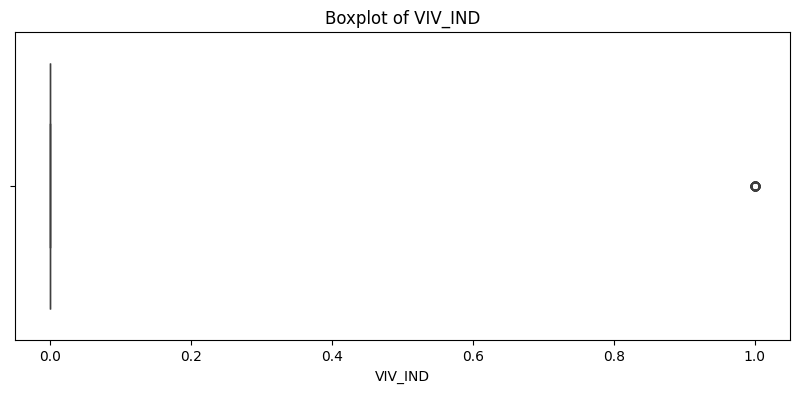

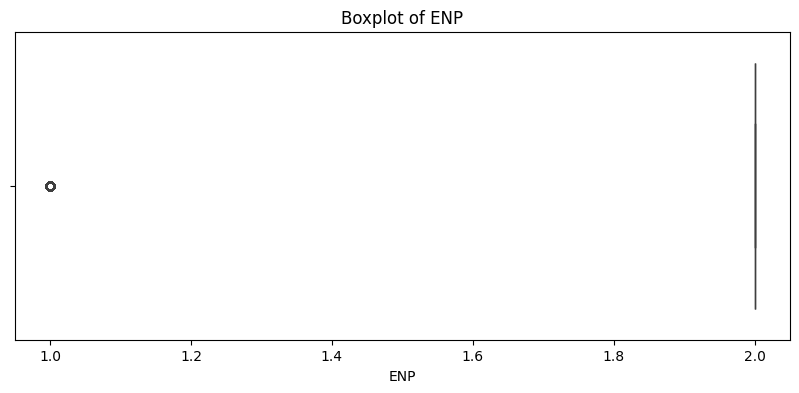

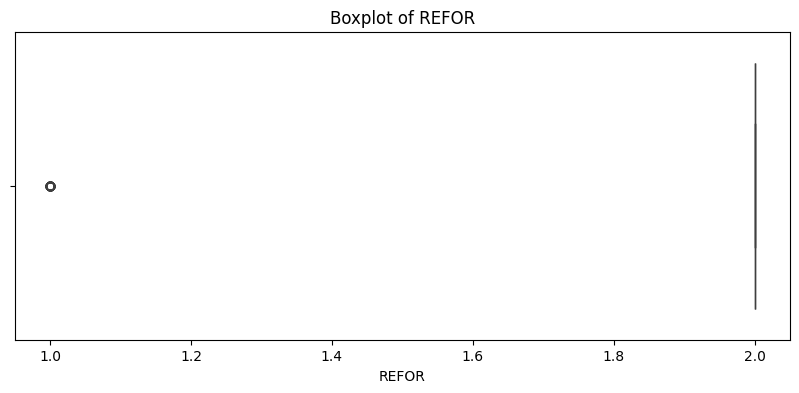

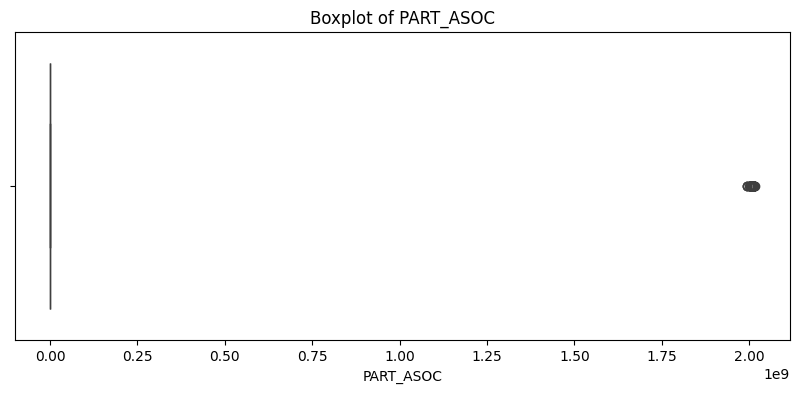

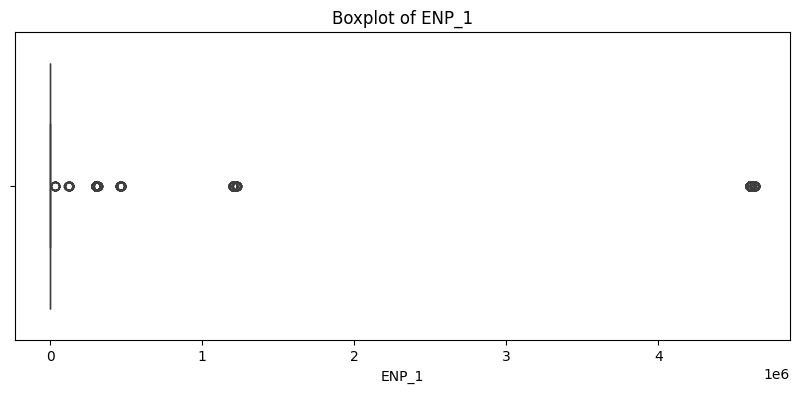

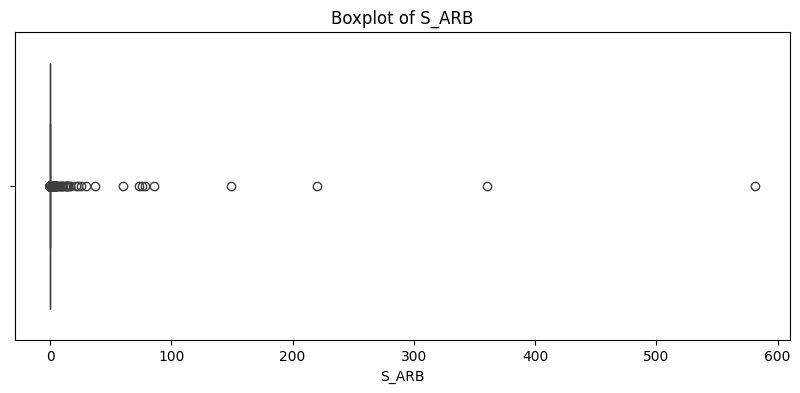

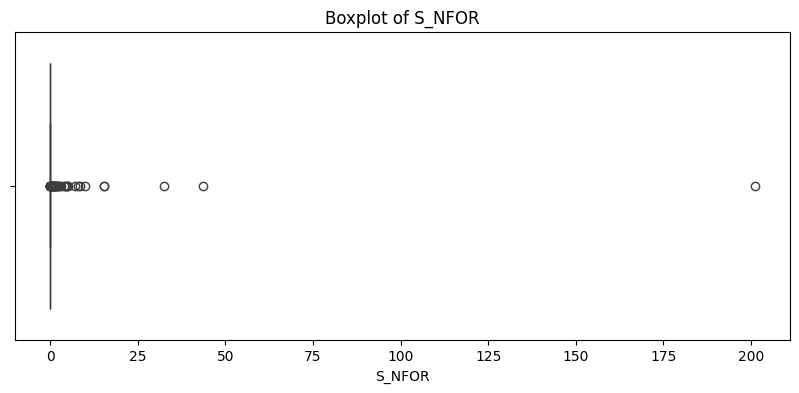

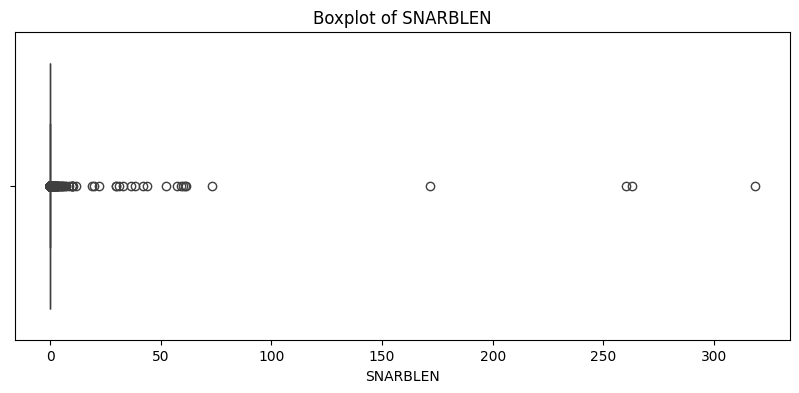

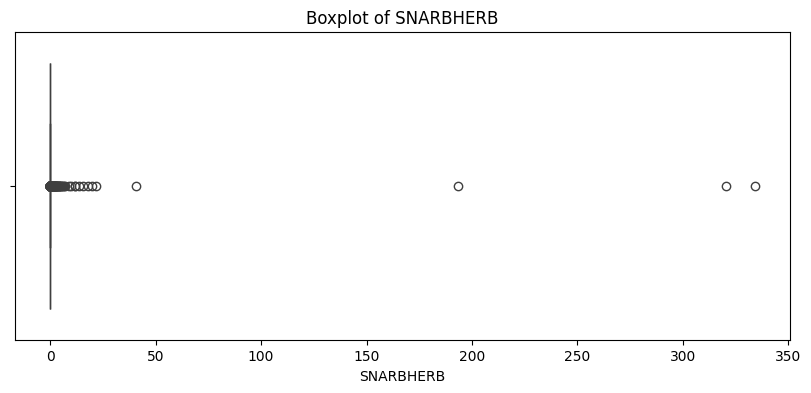

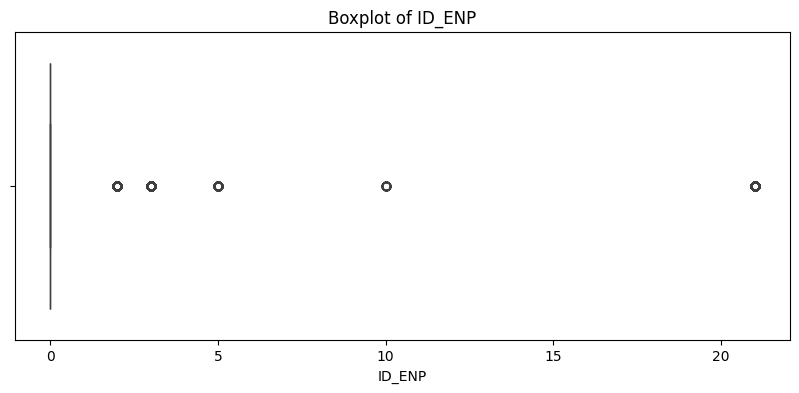

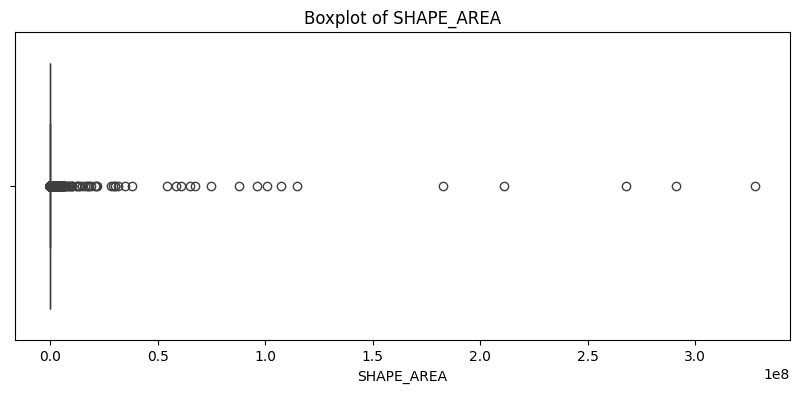

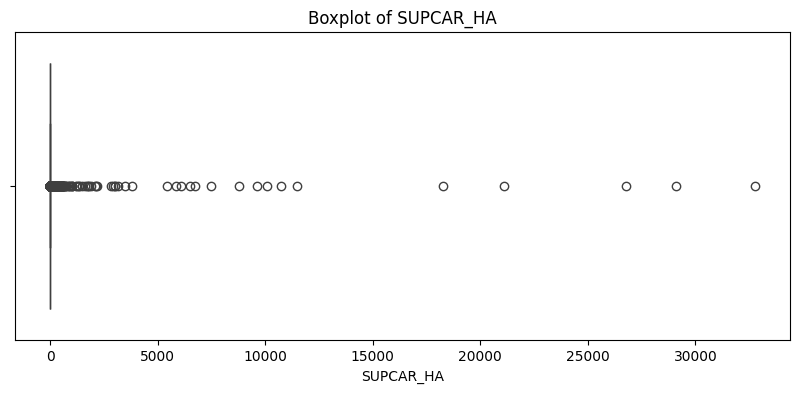

In [10]:

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df[numerical_cols].fillna(df[numerical_cols].median())


df_numerical = df_numerical.loc[:, df_numerical.nunique() > 1]


for col in df_numerical.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_numerical[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# <span style="color:#FFA500;">Análisis de variables numéricas</span>

Hallo pares de correlaciones entre variables. La mayoria de las correlaciones por encima de 0.85 son muy obvias por lo que las elimino y muestro las 30 primeras. 

In [11]:
corr_matrix = df_numerical.corr()

corr_pairs = corr_matrix.abs().unstack()
corr_pairs = corr_pairs[corr_pairs < 1]

# Filtro correlaciones superiores al 0.85
filtered_pairs = corr_pairs[corr_pairs < 0.85]
sorted_pairs = filtered_pairs.sort_values(ascending=False)

print(sorted_pairs.head(30))


SUP_F       NA_PARTIC     0.846395
NA_PARTIC   SUP_F         0.846395
TOT_EST     NA_PARTIC     0.842730
NA_PARTIC   TOT_EST       0.842730
            SHAPE_AREA    0.830086
SHAPE_AREA  NA_PARTIC     0.830086
NA_PARTIC   SUPCAR_HA     0.830086
SUPCAR_HA   NA_PARTIC     0.830086
MUERTOS     NA_CONSOR     0.828150
NA_CONSOR   MUERTOS       0.828150
X           NUMPARTE      0.827255
NUMPARTE    X             0.827255
A_CONSOR    NA_EST_CA     0.825923
NA_EST_CA   A_CONSOR      0.825923
X           ANYO          0.824194
ANYO        X             0.824194
Y           NUMPARTE      0.818857
NUMPARTE    Y             0.818857
NA_PARTIC   TOT_NARB      0.818620
TOT_NARB    NA_PARTIC     0.818620
ANYO        Y             0.815660
Y           ANYO          0.815660
EIMP_GLOB   V_SILV        0.804974
V_SILV      EIMP_GLOB     0.804974
NARB_PUBL   TOT_NARB      0.804071
TOT_NARB    NARB_PUBL     0.804071
EIMP_GLOB   PAISAJE       0.803415
PAISAJE     EIMP_GLOB     0.803415
X           ET_ID   

In [12]:
meteorological_features = ["D_VIENTO", "DULLUVIA", "H_RELAT", "V_VIENTO"]
firefighting_assets = ["AVIANFNUM", "HELTRANUM", "BULDOZZER", "AVICARNUM", "AUTOBOMBA" ]

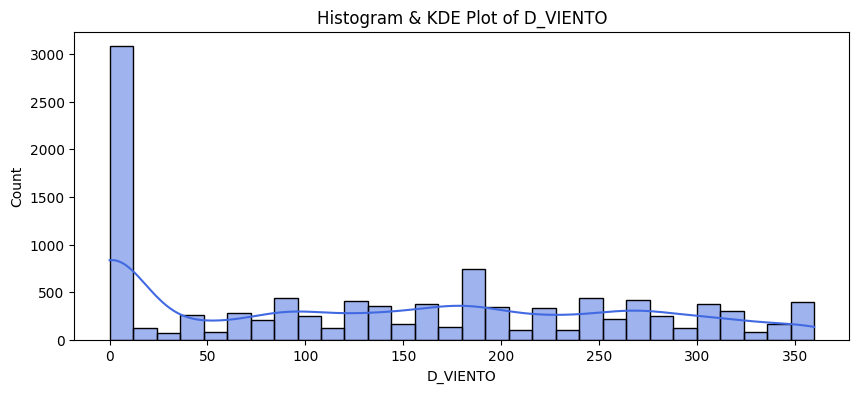

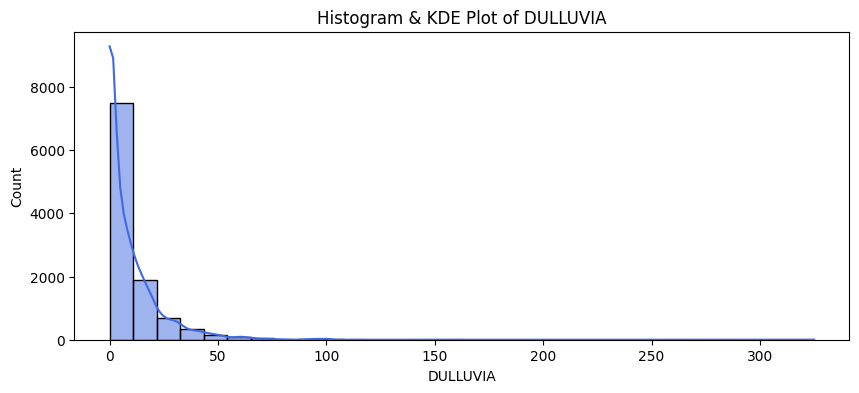

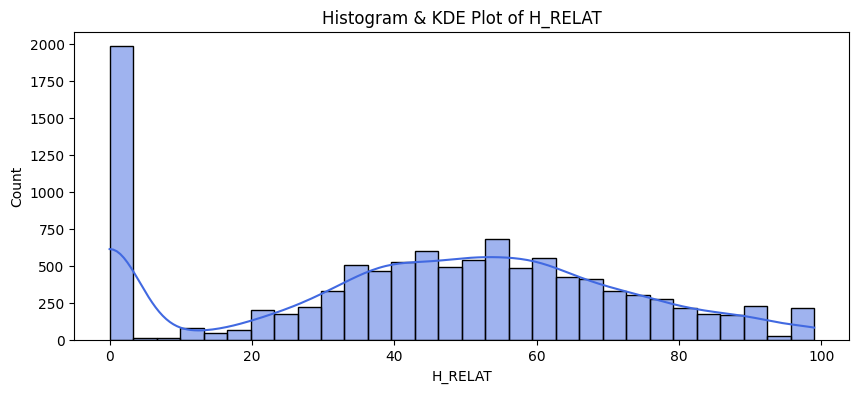

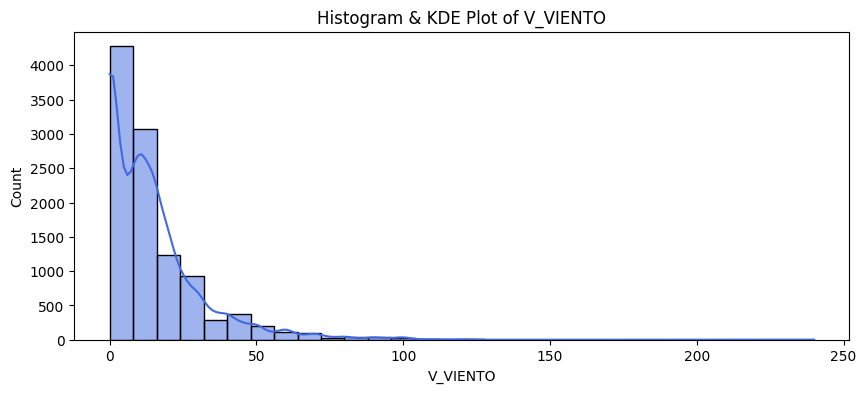

In [13]:
for col in meteorological_features:
    if col in df.columns:  
        plt.figure(figsize=(10, 4))

        
        sns.histplot(df[col], kde=True, bins=30, color="royalblue")

       
        plt.title(f"Histogram & KDE Plot of {col}")


        plt.show()
    else:
        print(f"Warning: Column '{col}' not found in the dataset.")

Hay demasiados valores en 0 para algunas de las variables meteorológicas, por lo que imputo los ceros por la mediana

In [14]:
mediana_d_viento = df['D_VIENTO'][df['D_VIENTO'] != 0].median()
df['D_VIENTO'] = df['D_VIENTO'].replace(0, mediana_d_viento)

mediana_h_relat = df['H_RELAT'][df['H_RELAT'] != 0].median()
df['H_RELAT'] = df['H_RELAT'].replace(0, mediana_h_relat)

mediana_d_viento = df['DULLUVIA'][df['DULLUVIA'] != 0].median()
df['DULLUVIA'] = df['DULLUVIA'].replace(0, mediana_d_viento)



Represento scatterplots entre las variables meteorológicas y los medios técnicos

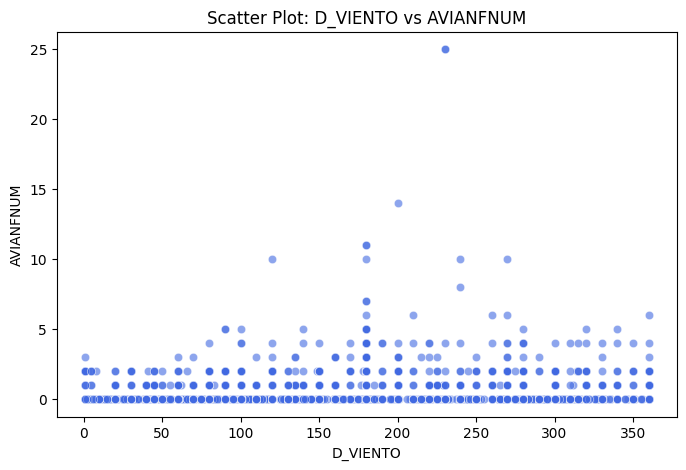

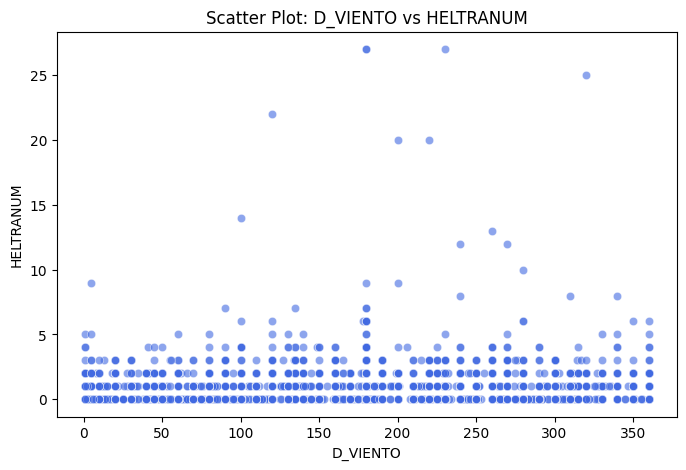

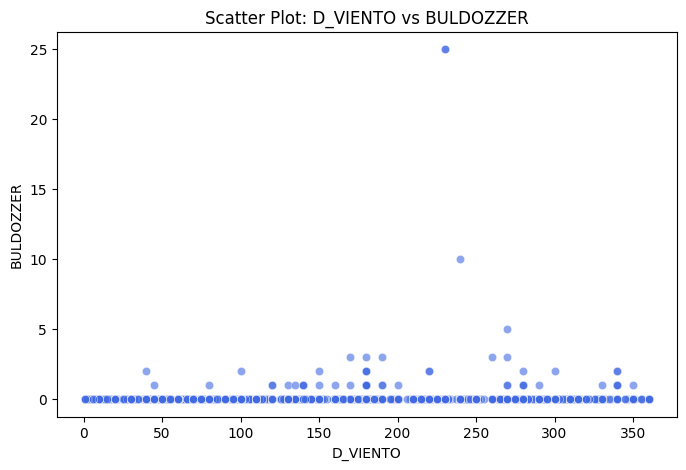

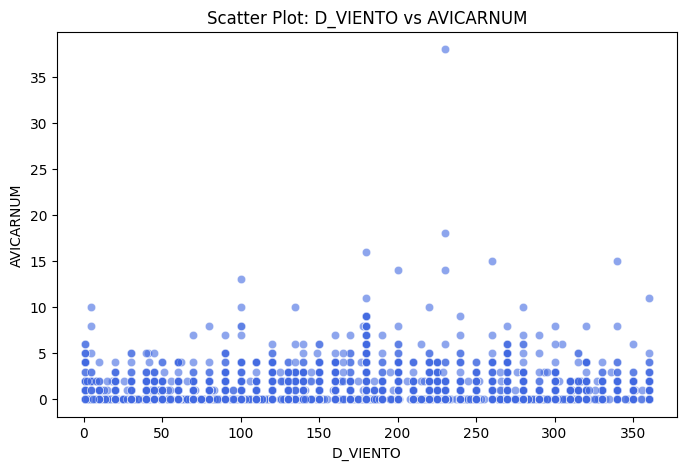

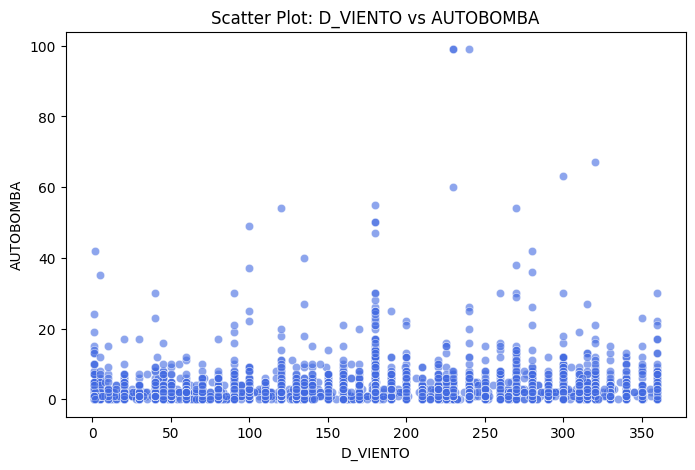

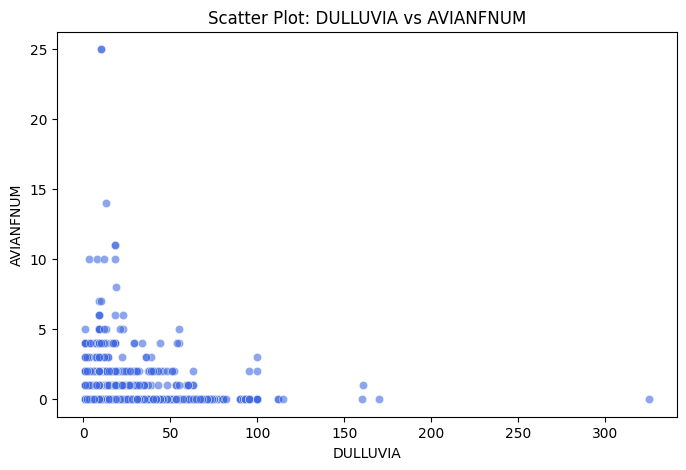

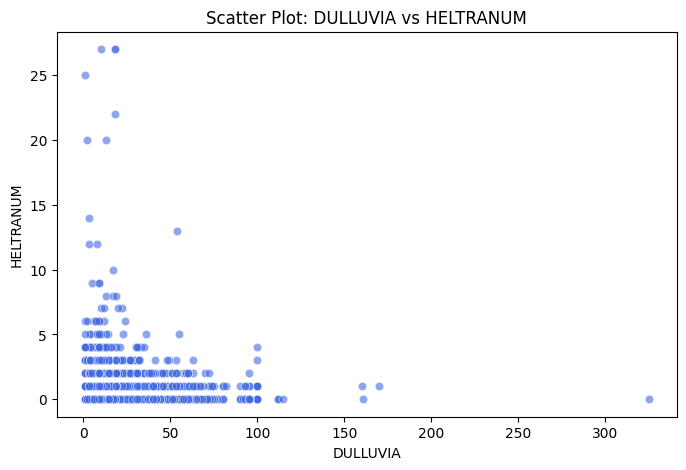

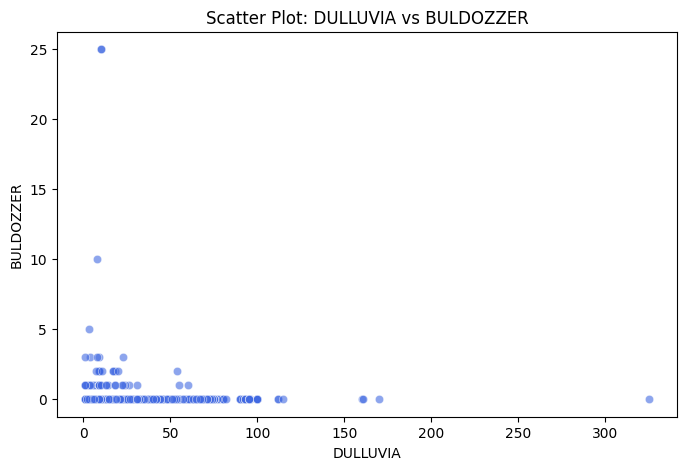

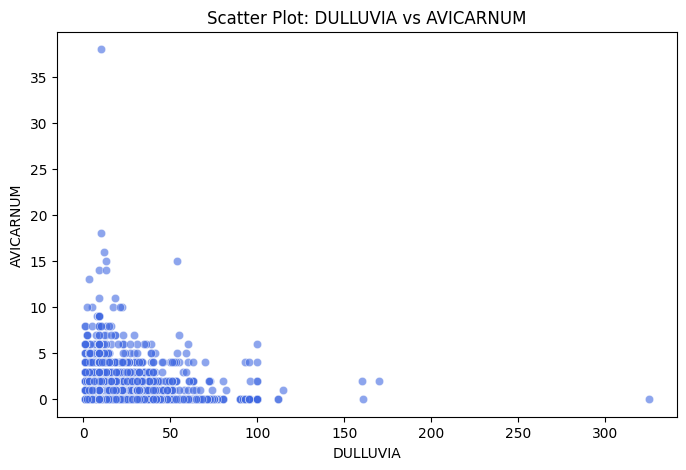

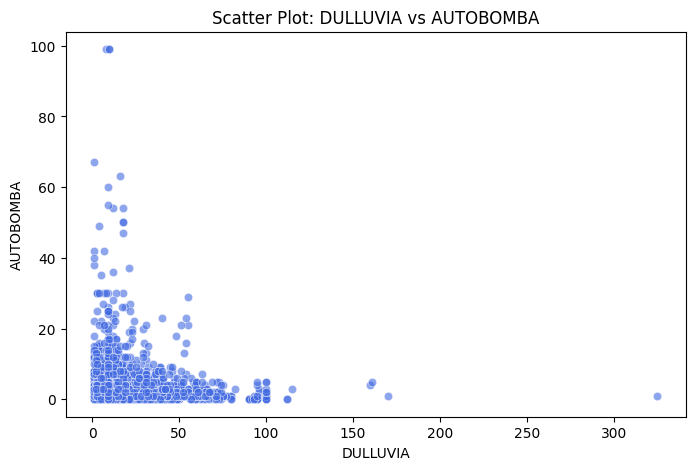

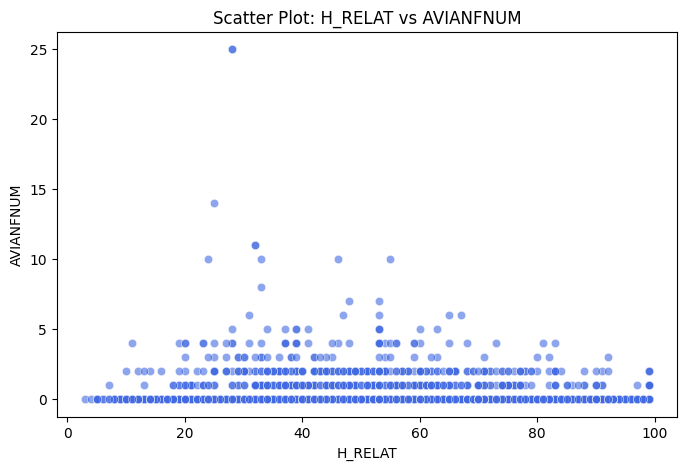

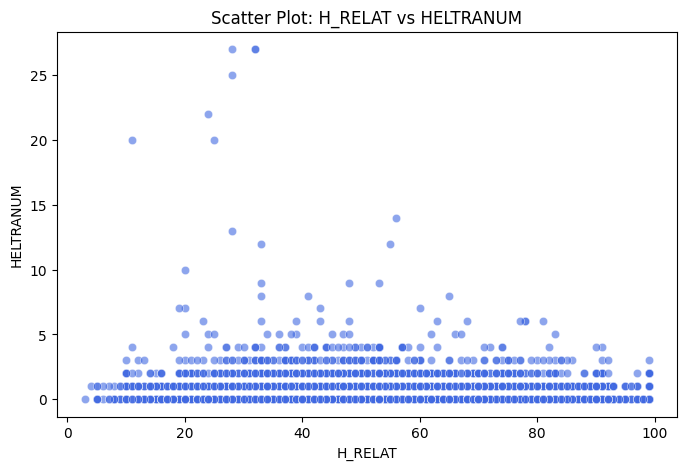

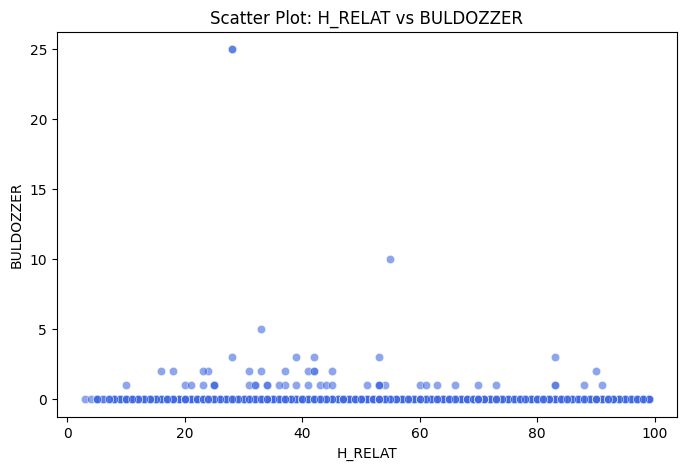

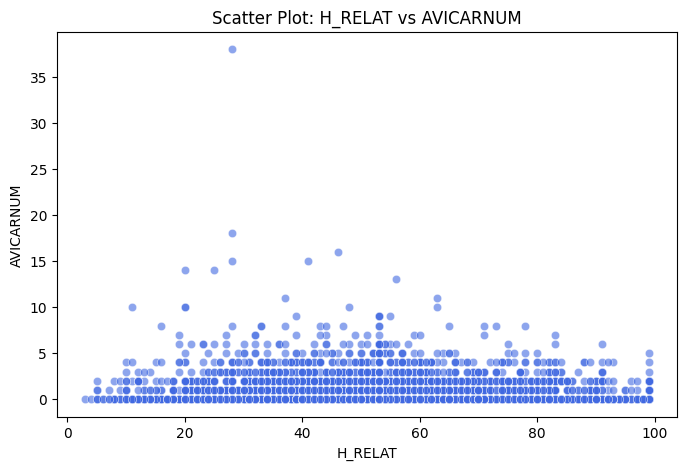

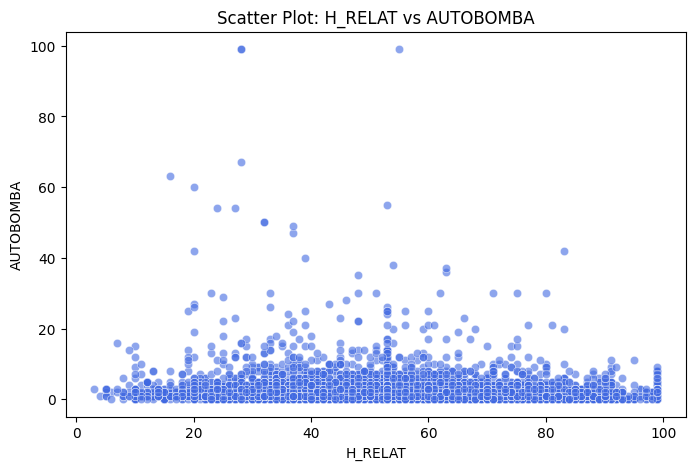

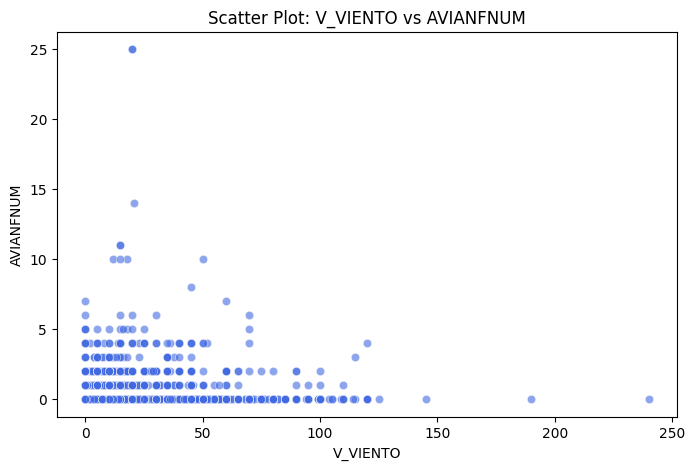

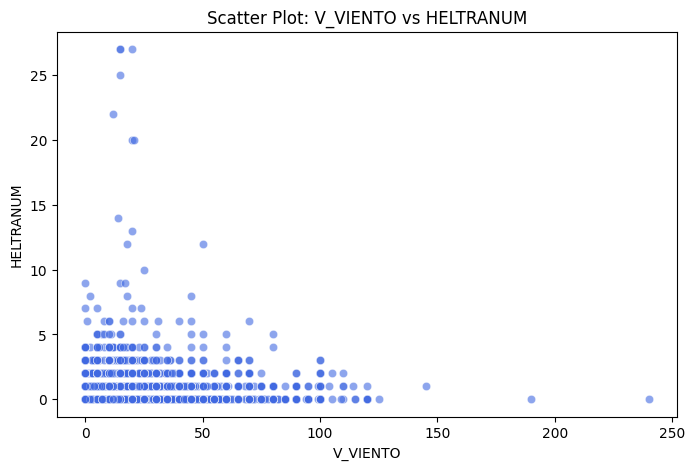

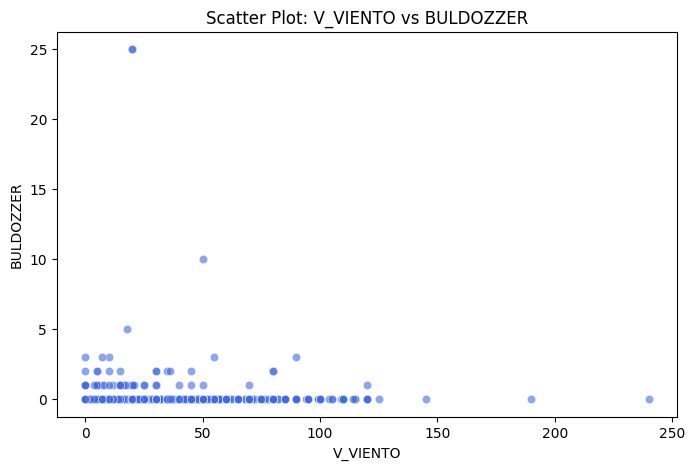

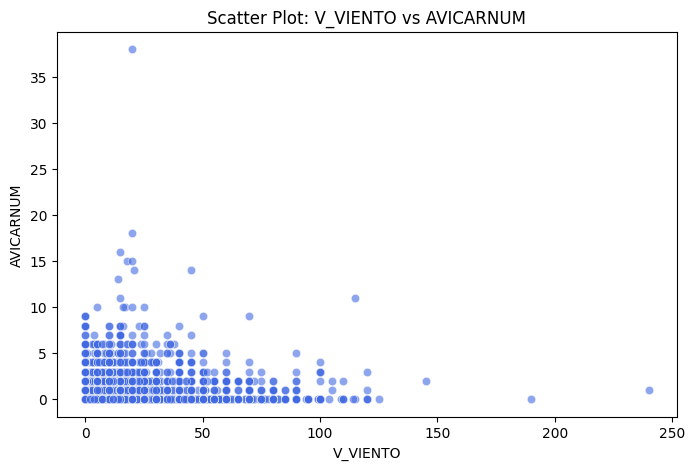

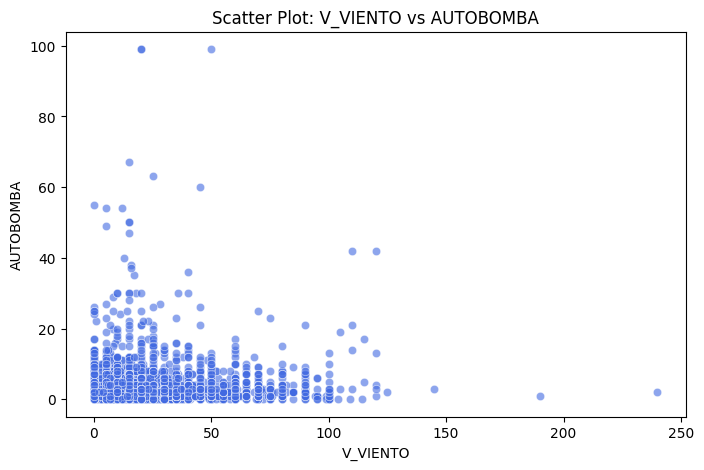

In [15]:
for met_feature in meteorological_features:
    for asset in firefighting_assets:
        if met_feature in df.columns and asset in df.columns:  
            plt.figure(figsize=(8, 5))
            
            # Create scatter plot
            sns.scatterplot(x=df[met_feature], y=df[asset], alpha=0.6, color="royalblue")
            
            # Add title and labels
            plt.title(f"Scatter Plot: {met_feature} vs {asset}")
            plt.xlabel(met_feature)
            plt.ylabel(asset)
            
            # Show plot
            plt.show()
        else:
            print(f" Columns '{met_feature}' o '{asset}' no encontrado en el dataset.")


# <span style="color:#FFA500;">Análisis de variables categóricas</span>

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [17]:
categorical_cols

Index(['CCAA_NOM', 'PROV_NOM', 'COM_NOM', 'NOM_MUN', 'PARAJE', 'CUAD',
       'F_DET_AMD', 'H_DETEC', 'F_PM_TER', 'H_PM_TER', 'FPM_AEEXT',
       'HPM_AEEXT', 'FPBRIGHEL', 'HPBRIGHEL', 'FCONTROL', 'HCONTROL',
       'FEXTINC', 'HEXTINC', 'DETECP_TXT', 'INIJUN_TXT', 'T_CAUS_TXT',
       'G_CAUS_TXT', 'MOTIV_TXT', 'CAUSAN_TXT', 'CAUSA_TXT', 'CDIA_TXT',
       'HORA', 'MOD_CO_TXT', 'IND_PE_TXT', 'T_FUEG_TXT', 'MEDIO_TXT',
       'RETARD_TXT', 'ATAQUE_TXT', 'TATACI_TXT', 'ENP_1_TXT', 'ID_ENP_TXT',
       'OBSERV'],
      dtype='object')

Incendios por provincias

C:\Users\Migue\AppData\Local\Temp\ipykernel_8612\2038490889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["PROV_NOM"].value_counts().index, y=df["PROV_NOM"].value_counts().values, palette="viridis")


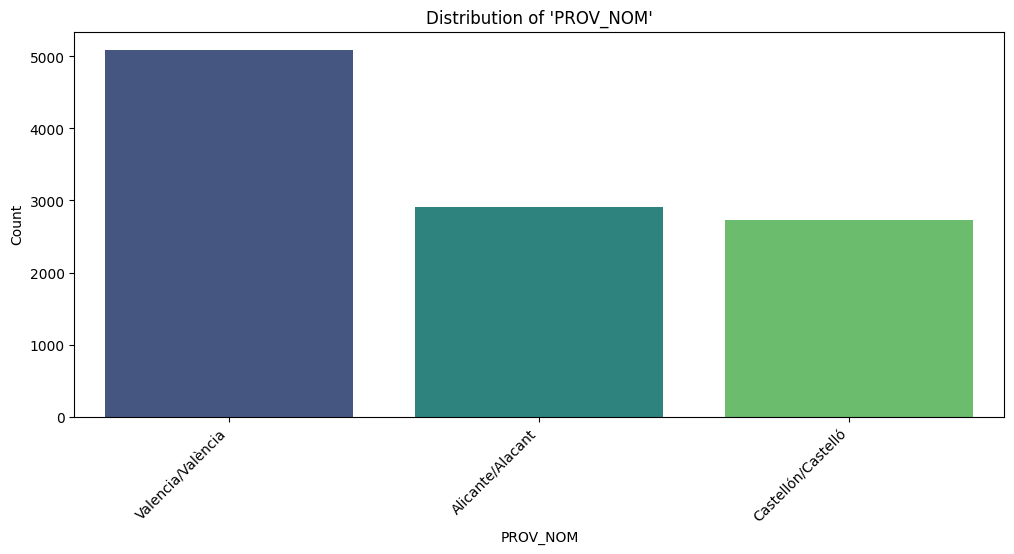

In [18]:
plt.figure(figsize=(12, 5))

# Plot bar chart of value counts
sns.barplot(x=df["PROV_NOM"].value_counts().index, y=df["PROV_NOM"].value_counts().values, palette="viridis")

# Add title and labels
plt.title(f"Distribution of 'PROV_NOM'")
plt.xlabel("PROV_NOM")
plt.ylabel("Count")


plt.xticks(rotation=45, ha='right')

plt.show()

In [19]:
df["H_DETEC"].head()

0    23:46
1    21:25
2    16:20
3     4:55
4    18:30
Name: H_DETEC, dtype: object

Histograma del número de incendios por año

C:\Users\Migue\AppData\Local\Temp\ipykernel_8612\990587363.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette=fire_palette)


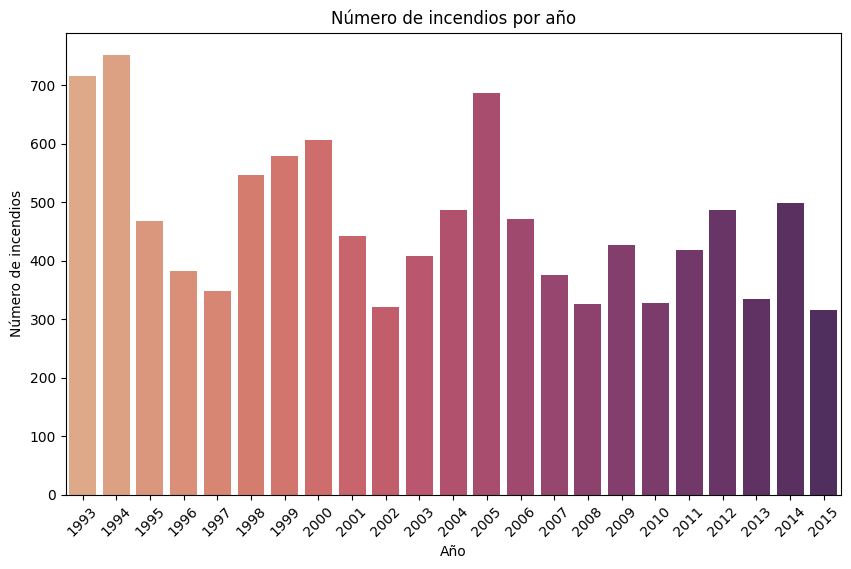

In [20]:
# Contar las ocurrencias por año
year_counts = df["year"].value_counts().sort_index()

fire_palette = sns.color_palette("flare", len(year_counts))

# Graficar con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette=fire_palette)
plt.xlabel("Año")
plt.ylabel("Número de incendios")
plt.title("Número de incendios por año")
plt.xticks(rotation=45)
plt.show()


Incendios por día de la semana

C:\Users\Migue\AppData\Local\Temp\ipykernel_8612\401975038.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette=fire_palette)


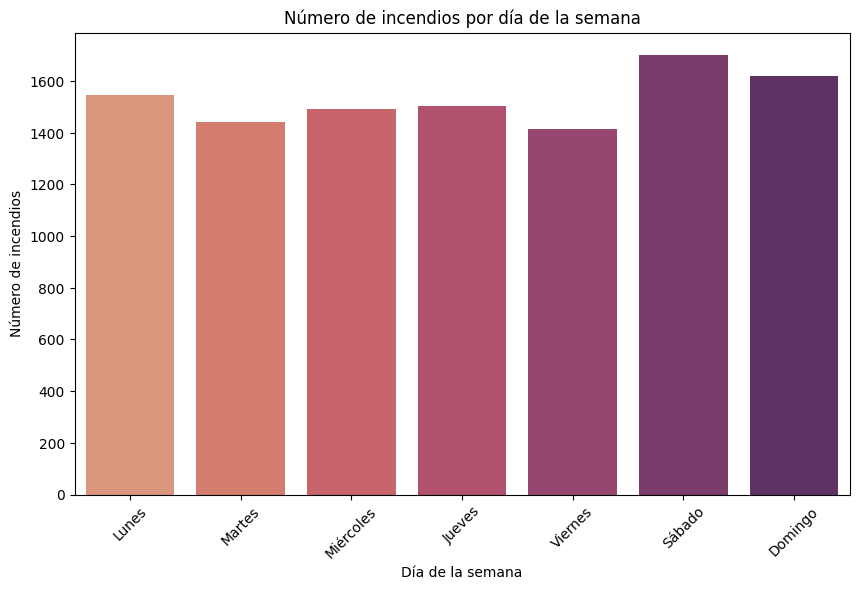

In [21]:
df["day_of_the_week"] = df["F_DETEC"].dt.day_of_week

day_labels = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
day_counts = df["day_of_the_week"].value_counts().sort_index()

fire_palette = sns.color_palette("flare", len(day_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette=fire_palette)
plt.xlabel("Día de la semana")
plt.ylabel("Número de incendios")
plt.title("Número de incendios por día de la semana")
plt.xticks(ticks=range(7),labels=day_labels,rotation=45)
plt.show()

Histograma del número de incendios por mes del año

C:\Users\Migue\AppData\Local\Temp\ipykernel_8612\205210431.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette=fire_palette)
C:\Users\Migue\AppData\Local\Temp\ipykernel_8612\205210431.py:7: UserWarning: 
The palette list has fewer values (7) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=month_counts.index, y=month_counts.values, palette=fire_palette)


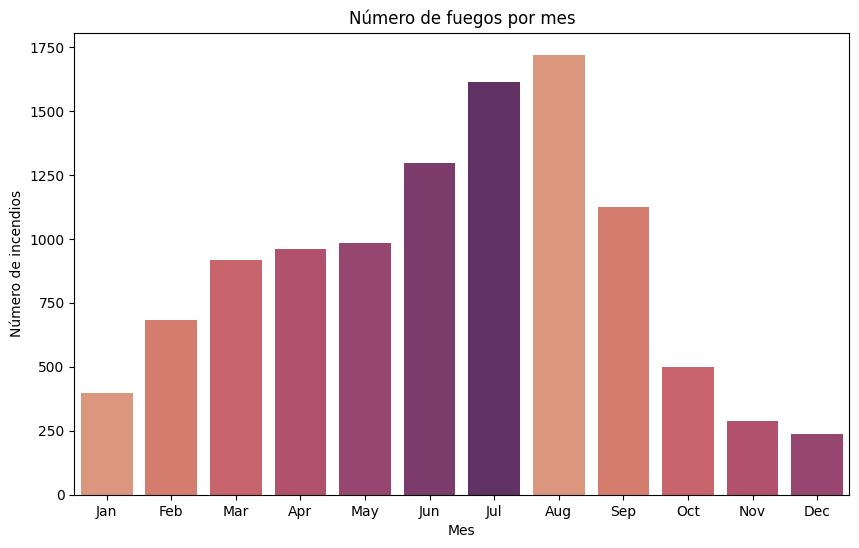

In [22]:
df["month"] = df["F_DETEC"].dt.month


month_counts = df["month"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette=fire_palette)


plt.xlabel("Mes")
plt.ylabel("Número de incendios")
plt.title("Número de fuegos por mes")
plt.xticks(ticks=range(12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.show()


Sumatorio de hectáreas quemadas por año 

C:\Users\Migue\AppData\Local\Temp\ipykernel_8612\2402099746.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_sum_by_year.index, y=area_sum_by_year.values, palette=fire_palette)


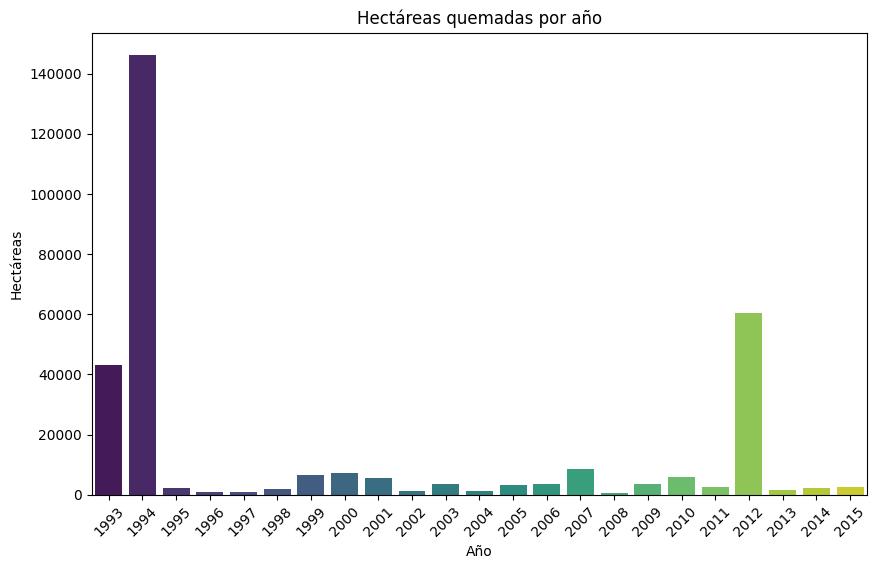

In [23]:
area_sum_by_year = df.groupby("year")["SUPCAR_HA"].sum().sort_index()

# Crear una paleta de colores para la cantidad de años
fire_palette = sns.color_palette("viridis", len(area_sum_by_year))

# Graficar el sumatorio de SUPCAR_HA por año
plt.figure(figsize=(10, 6))
sns.barplot(x=area_sum_by_year.index, y=area_sum_by_year.values, palette=fire_palette)
plt.xlabel("Año")
plt.ylabel("Hectáreas")
plt.title("Hectáreas quemadas por año")
plt.xticks(rotation=45)
plt.show()

C:\Users\Migue\AppData\Local\Temp\ipykernel_8612\982175752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=muertos.index, y=muertos.values, palette=fire_palette)


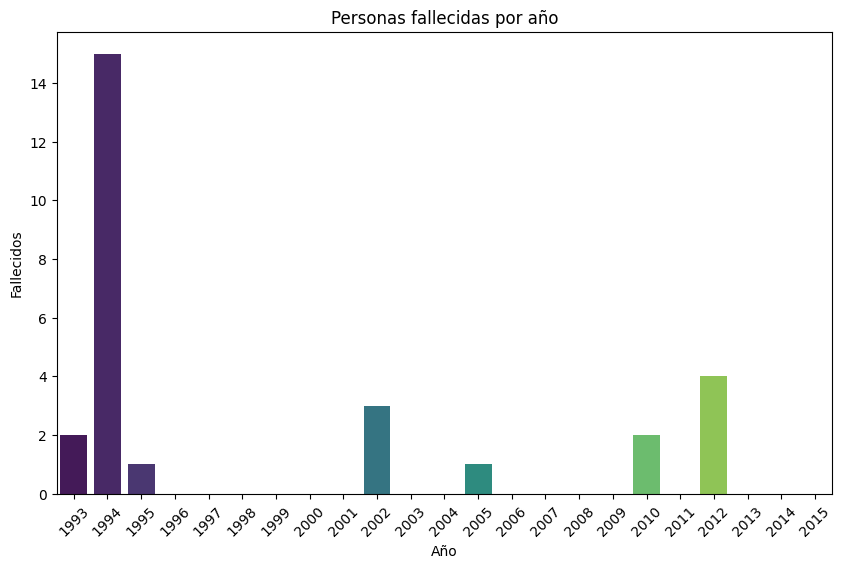

In [24]:
muertos = df.groupby("year")["MUERTOS"].sum().sort_index()

# Crear una paleta de colores para la cantidad de años
fire_palette = sns.color_palette("viridis", len(muertos))

# Graficar el sumatorio de SUPCAR_HA por año
plt.figure(figsize=(10, 6))
sns.barplot(x=muertos.index, y=muertos.values, palette=fire_palette)
plt.xlabel("Año")
plt.ylabel("Fallecidos")
plt.title("Personas fallecidas por año")
plt.xticks(rotation=45)
plt.show()

# <span style="color:#FFA500;">Localización de incendios</span>

Tenemos bastantes filas donde las coordenadas X e Y son 0. Esto lo arreglaremos más adelante. Por ahora para ver las zonas con más incendios quito las filas donde no tenemos localización.

In [25]:
df_con_localizacion = df.loc[(df['X'] != 0) & (df['Y'] != 0)]

Algunos puntos son erróneos y están fuera de la Comunidad Valenciana. Filtro el dataframe por la zona donde esta se encuentra.

In [26]:
df_con_localizacion= df_con_localizacion[df_con_localizacion['X'] >= 600000]
df_con_localizacion= df_con_localizacion[df_con_localizacion['Y'] >= 4170000]
df_con_localizacion= df_con_localizacion[df_con_localizacion['Y'] <= 4540000]

Visualizo los incendios y densidad de fuegos de zonas en las que se producen.

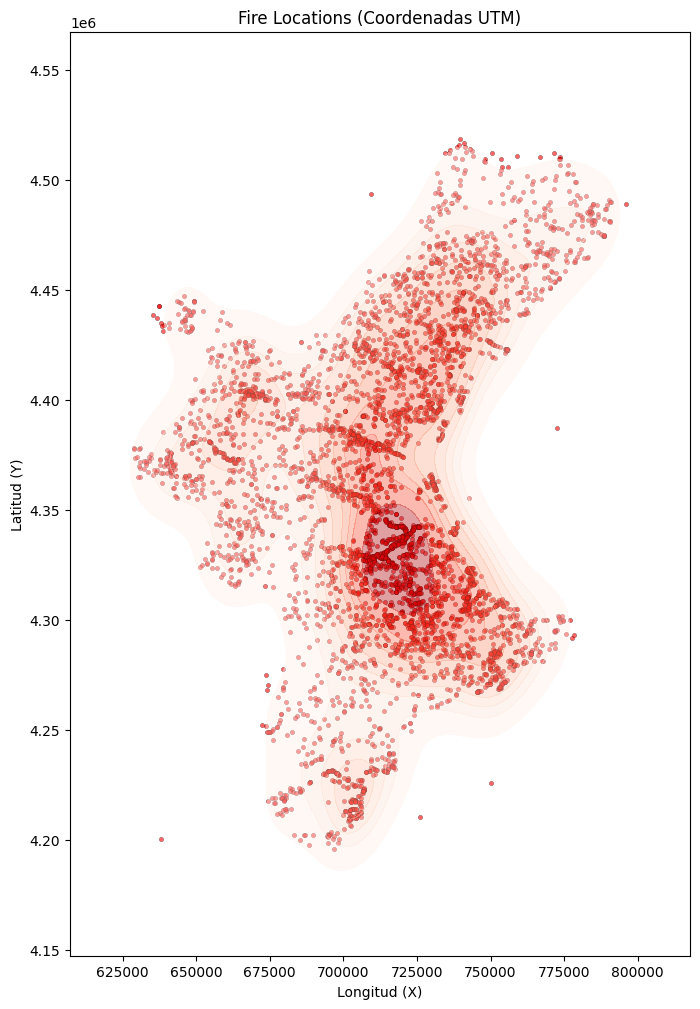

In [27]:

if "X" in df_con_localizacion.columns and "Y" in df_con_localizacion.columns:
    plt.figure(figsize=(8, 12))

   
    sns.scatterplot(x=df_con_localizacion["X"], y=df_con_localizacion["Y"], color="red", alpha=0.6, edgecolor="black", s=10)

    sns.kdeplot(x=df_con_localizacion["X"], y=df_con_localizacion["Y"], cmap="Reds", fill=True, alpha=0.4, thresh=0.05)

    
    plt.title("Fire Locations (Coordenadas UTM)")
    plt.xlabel("Longitud (X)")
    plt.ylabel("Latitud (Y)")


    plt.show()
else:
    print("Error: The dataset does not contain 'X' (longitude) or 'Y' (latitude) columns.")


# <span style="color:#FFA500;">Causa de los incendios</span>

Principales causas incendios en la Comunidad Valenciana


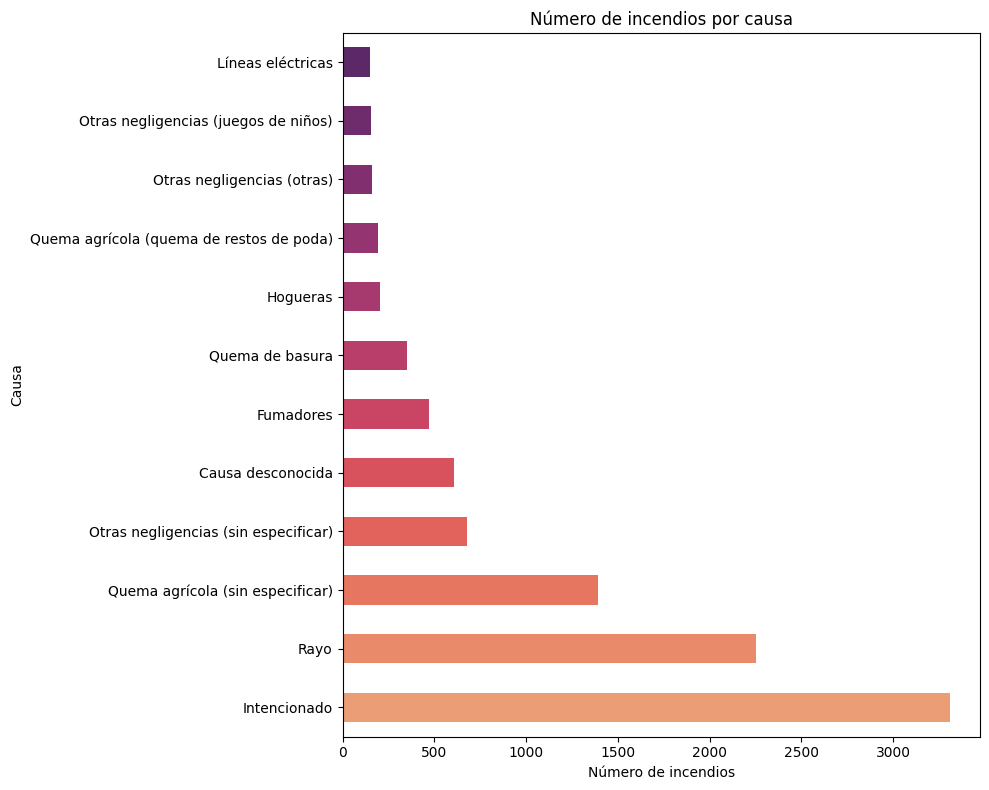

In [28]:

causas_count = df['CAUSA_TXT'].value_counts()

causas_mayor_100 = causas_count[causas_count > 100]

colors = sns.color_palette('flare', n_colors=len(causas_mayor_100))

# Luego, podemos hacer un bar chart horizontal
plt.figure(figsize=(10, 8))  # Ajusta el tamaño a tu gusto
causas_mayor_100.plot(kind='barh', color = colors)
plt.title('Número de incendios por causa')
plt.xlabel('Número de incendios')
plt.ylabel('Causa')
plt.tight_layout()
plt.show()


# <span style="color:#FFA500;">Estudio consistencia de recursos usados vs hectáreas quemadas</span>

### Empiezo estudiando recursos técnicos como autobombas y aviones de descarga

#### Aviones de descarga

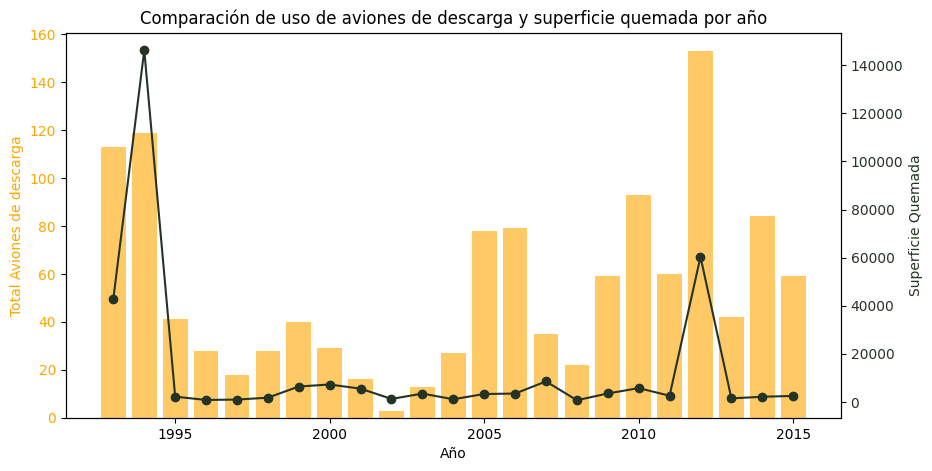

In [29]:
grouped_avion_descarga = df.groupby('year').agg({
    'AVIANFNUM': 'sum',  # o 'mean'
    'SUPCAR_HA': 'sum' # o 'mean'
}).reset_index()

# Renombra las columnas si deseas mayor claridad
grouped_avion_descarga.columns = ['year', 'planes_used', 'surface_burned']

# Ejemplo: Dibujar un gráfico de barras comparando Aviones de descarga vs superficie quemada
fig, ax1 = plt.subplots(figsize=(10, 5))

# Eje Y para aviones de descarga
ax1.bar(grouped_avion_descarga['year'], grouped_avion_descarga['planes_used'], color='orange', alpha=0.6, label='Aviones de descarga')
ax1.set_xlabel('Año')
ax1.set_ylabel('Total Aviones de descarga', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Crear un segundo eje Y para la superficie quemada
ax2 = ax1.twinx()
ax2.plot(grouped_avion_descarga['year'], grouped_avion_descarga['surface_burned'], color='#253324', marker='o', label='Superficie Quemada')
ax2.set_ylabel('Superficie Quemada', color='#253324')
ax2.tick_params(axis='y', labelcolor='#253324')

plt.title('Comparación de uso de aviones de descarga y superficie quemada por año')
plt.show()


### Autobombas

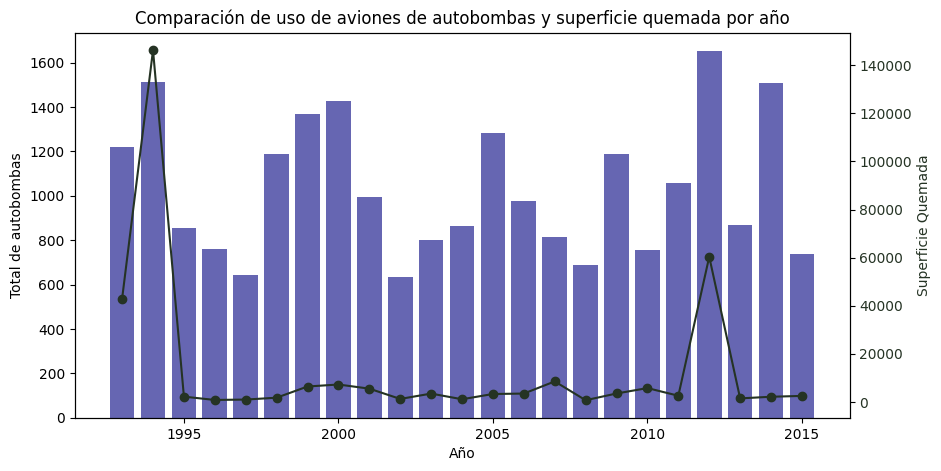

In [30]:
grouped_autobombas = df.groupby('year').agg({
    'AUTOBOMBA': 'sum',  # o 'mean'
    'SUPCAR_HA': 'sum' # o 'mean'
}).reset_index()

# Renombra las columnas si deseas mayor claridad
grouped_autobombas.columns = ['year', 'autobombas_used', 'surface_burned']

# Ejemplo: Dibujar un gráfico de barras comparando de autobombas vs superficie quemada
fig, ax1 = plt.subplots(figsize=(10, 5))

# Eje Y para aviones de descarga
ax1.bar(grouped_autobombas['year'], grouped_autobombas['autobombas_used'], color='navy', alpha=0.6, label= 'autobombas')
ax1.set_xlabel('Año')
ax1.set_ylabel('Total de autobombas')
ax1.tick_params(axis='y')

# Crear un segundo eje Y para la superficie quemada
ax2 = ax1.twinx()
ax2.plot(grouped_autobombas['year'], grouped_autobombas['surface_burned'], color='#253324', marker='o', label='Superficie Quemada')
ax2.set_ylabel('Superficie Quemada', color='#253324')
ax2.tick_params(axis='y', labelcolor='#253324')

plt.title('Comparación de uso de aviones de autobombas y superficie quemada por año')
plt.show()

### Ahora estudio la relación con bomberos

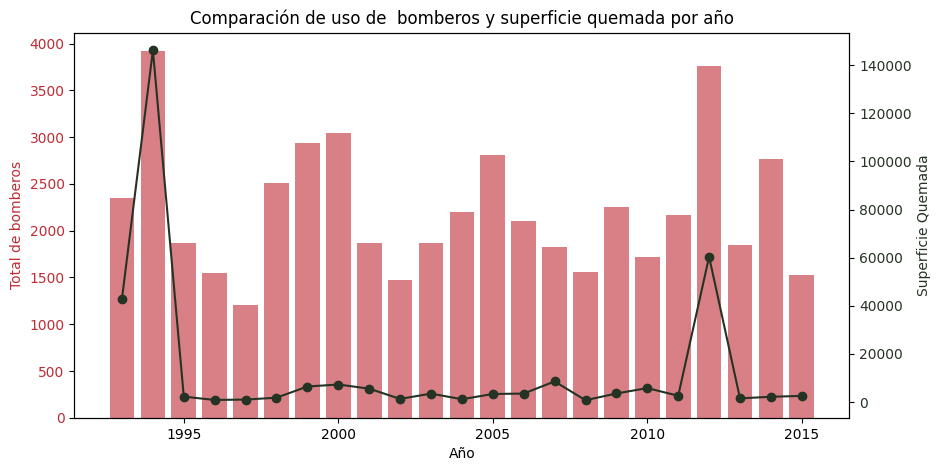

In [31]:
grouped_bomberos = df.groupby('year').agg({
    'BOMBEROS': 'sum',  # o 'mean'
    'SUPCAR_HA': 'sum' # o 'mean'
}).reset_index()

# Renombra las columnas si deseas mayor claridad
grouped_bomberos.columns = ['year', 'bomberos_used', 'surface_burned']

# Ejemplo: Dibujar un gráfico de barras comparando de bomberos vs superficie quemada
fig, ax1 = plt.subplots(figsize=(10, 5))

# Eje Y para bomberos
ax1.bar(grouped_bomberos['year'], grouped_bomberos['bomberos_used'], color='#BF2C34', alpha=0.6, label= 'bomberos')
ax1.set_xlabel('Año')
ax1.set_ylabel('Total de bomberos', color='#BF2C34')
ax1.tick_params(axis='y', labelcolor='#BF2C34')

# Crear un segundo eje Y para la superficie quemada
ax2 = ax1.twinx()
ax2.plot(grouped_bomberos['year'], grouped_bomberos['surface_burned'], color='#253324', marker='o', label='Superficie Quemada')
ax2.set_ylabel('Superficie Quemada', color='#253324')
ax2.tick_params(axis='y', labelcolor='#253324')

plt.title('Comparación de uso de  bomberos y superficie quemada por año')
plt.show()

## <span style="color:#2ECC71;">A partir de aquí trabajo con el dataset final que alimentará al modelo enriquecido con variables de Google Earth Engine</span>

Leo el nuevo dataset

In [32]:
df_final = pd.read_csv("Datasets/df_con_grid_fire.csv") 

In [33]:
print(f"Dataset shape: {df_final.shape[0]} filas, {df_final.shape[1]} columnas")

Dataset shape: 10526 filas, 161 columnas


Hallo el porcentaje de faltantes

In [34]:
missing_percentage_final = (df_final.isnull().sum() / len(df_final)) * 100
missing_df_final = missing_percentage_final[missing_percentage_final > 0].sort_values(ascending=False).to_frame()
missing_df_final.columns = ["Porcentaje de faltantes"]
columns_with_missing = missing_df_final.index.tolist()
missing_df_final

,Porcentaje de faltantes
NCAUSANT,100.000000
TATACI_TXT,98.812464
MOTIV_TXT,93.140794
ENP_1_TXT,93.131294
ID_ENP_TXT,93.121794
RETARD_TXT,90.262208
HPBRIGHEL,84.828045
FPBRIGHEL,84.571537
OBSERV,81.151435
HPM_AEEXT,57.562227


Creo una lista con las variables meteorólogicas nuevas y imputo sus faltantes con la mediana

In [35]:
new_meteorological_variables = ["WindSpeed_U", "WindSpeed_V", "Temperature (C)", "Humidity (%)"]

for var in new_meteorological_variables:

    mediana = df_final[var].median()
    
   
    df_final[var] = df_final[var].fillna(mediana)

Creo histogramas de ellas

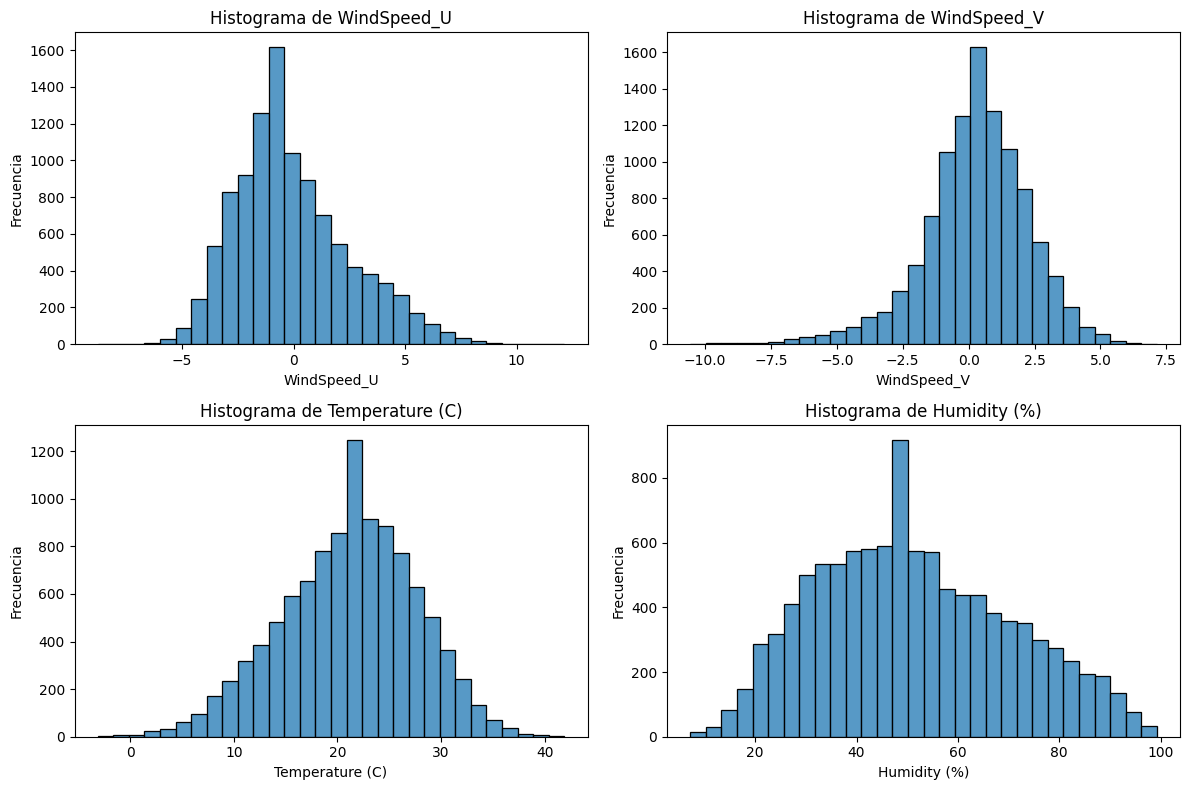

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Iterar sobre las variables y los axes
for i, var in enumerate(new_meteorological_variables):
    row = i // 2  
    col = i % 2   
    
    sns.histplot(data=df_final, x=var, bins=30, ax=axes[row, col])
    axes[row, col].set_title(f"Histograma de {var}")
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel("Frecuencia")

plt.tight_layout()  
plt.show()

A partir de los datos de "WindSpeed_U" (componente este-oeste) y "WindSpeed_V" (componente norte-sur) creo las variables "wind_abs" para saber el valor absoluto del viento y "wind_dir" para calcular su dirección teniendo un cuenta que, en meteorología, 0° es un viento que viene del norte 

In [37]:
df_final["wind_abs"] = np.sqrt(df_final["WindSpeed_U"]**2 + df_final["WindSpeed_V"]**2)
df_final["wind_dir"] = (270 - np.degrees(np.arctan2(df_final["WindSpeed_V"], df_final["WindSpeed_U"]))) % 360



In [38]:
df_final[["WindSpeed_U", "WindSpeed_V", "wind_abs", "wind_dir"]].head(10)

,WindSpeed_U,WindSpeed_V,wind_abs,wind_dir
0,2.013870,-1.369427,2.435365,304.215604
1,2.685486,-0.926575,2.840841,289.036000
2,2.523636,1.896225,3.156645,233.079308
3,1.961746,-1.784943,2.652257,312.298257
4,-1.420746,0.687866,1.578505,115.834340
5,5.338669,-0.561111,5.368075,275.999944
6,-3.926926,-5.086953,6.426339,37.666714
7,-2.517929,2.659479,3.662348,136.566073
8,-1.500687,2.676870,3.068826,150.724470
9,4.663513,-1.445490,4.882397,287.221203


Creo una visualizacion tipo rosa de los vientos para ver los vientos predominantes cuando hay incendios

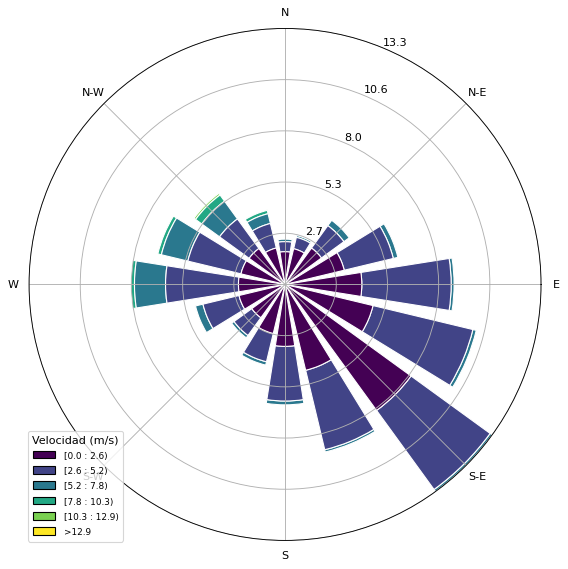

In [39]:
from windrose import WindroseAxes

# Creamos una figura y un eje 'WindroseAxes'
ax = WindroseAxes.from_ax()

# Graficamos la rosa de los vientos
ax.bar(
    df_final["wind_dir"], 
    df_final["wind_abs"], 
    normed=True,         
    opening=0.8,         
    edgecolor="white",   
)

# Agregamos la leyenda (velocidades) y mostramos
ax.set_legend(title="Velocidad (m/s)")  
plt.show()


Hallo la humedad media al comienzo de los incendios

In [45]:
humedad_media = df_final["Humidity (%)"].mean()
print(humedad_media)

51.224816451756695


Creo el nuevo dataframe con los 200 incendios que han quemado más territorio

In [40]:
df_top200 = df_final.nlargest(200, 'SUPCAR_HA')


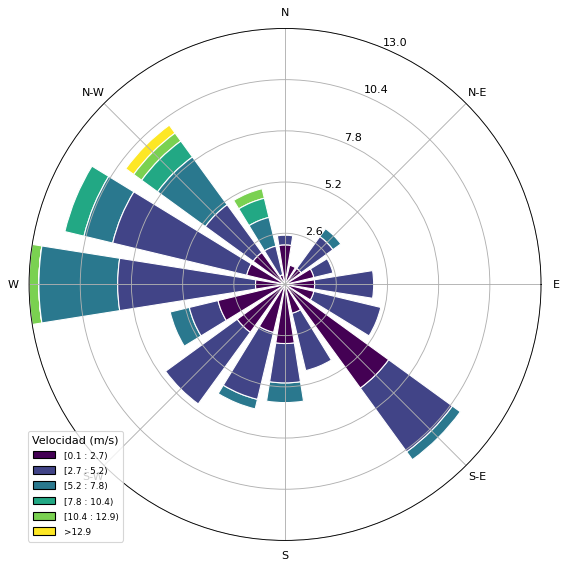

In [ ]:
ax = WindroseAxes.from_ax()

# Graficamos la rosa de los vientos
ax.bar(
    df_top200["wind_dir"], 
    df_top200["wind_abs"], 
    normed=True,         
    opening=0.8,         
    edgecolor="white",   
)

# Agregamos la leyenda (velocidades) y mostramos
ax.set_legend(title="Velocidad (m/s)")  
plt.show()


Humedad media al comienzo de los incendios más destructivos

In [46]:
humedad_media_final = df_top200["Humidity (%)"].mean()
print(humedad_media_final)

42.13173744123


In [47]:
df_top200["grid_name"].head()

10483    H1
10       I2
10485    I3
10486    L3
10475    E4
Name: grid_name, dtype: object